전력 사용량 예측 AI 경진대회
--

전력 | 한국에너지공단 | 시계열 | SMAPE


train.csv :
train 데이터 : 60개 건물들의 2020년 6월 1일 부터 2020년 8월 24일까지의 데이터
1시간 단위로 제공
전력사용량(kWh) 포함
train.shape: (122400, 10)


test.csv :
test 데이터 : 60개 건물들의 2020년 8월 25일 부터 2020년 8월 31일까지의 데이터
3시간 단위로 제공(강수량의 경우 6시간 단위로 제공, 예보데이터)
전력사용량(kWh) 미포함
test.shape: (10080, 9)




sample_submission.csv :
sample_submission 데이터
sample_submission.shape: (10080, 2)


In [1]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

# home
#train=pd.read_csv('C:/Users/bella/Desktop/빅데이터 분석수업자료/데이콘 전력사용량/energy/energy/train.csv', encoding='cp949', parse_dates=['date_time'])
#test=pd.read_csv('C:/Users/bella/Desktop/빅데이터 분석수업자료/데이콘 전력사용량/energy/energy/test.csv', encoding='cp949', parse_dates=['date_time'])
#sample_submission=pd.read_csv('C:/Users/bella/Desktop/빅데이터 분석수업자료/데이콘 전력사용량/energy/energy/sample_submission.csv', encoding='cp949', parse_dates=['num_date_time'])

#sd academy
train=pd.read_csv('C:/Users/sundooedu/Desktop/빅데이터분석수업자료/전력사용량 데이콘/energy/energy/train.csv', encoding='cp949', parse_dates=['date_time'])
test=pd.read_csv('C:/Users/sundooedu/Desktop/빅데이터분석수업자료/전력사용량 데이콘/energy/energy/test.csv', encoding='cp949', parse_dates=['date_time'])
sample_submission=pd.read_csv('C:/Users/sundooedu/Desktop/빅데이터분석수업자료/전력사용량 데이콘/energy/energy/sample_submission.csv', encoding='cp949', parse_dates=['num_date_time'])

In [2]:
df_train=pd.DataFrame(train)
df_test=pd.DataFrame(test)
df_sample_submission=pd.DataFrame(sample_submission)

In [3]:
df_train

,num,date_time,전력사용량(kWh),기온(°C),풍속(m/s),습도(%),강수량(mm),일조(hr),비전기냉방설비운영,태양광보유
0,1,2020-06-01 00:00:00,8179.056,17.6,2.5,92.0,0.8,0.0,0.0,0.0
1,1,2020-06-01 01:00:00,8135.640,17.7,2.9,91.0,0.3,0.0,0.0,0.0
2,1,2020-06-01 02:00:00,8107.128,17.5,3.2,91.0,0.0,0.0,0.0,0.0
3,1,2020-06-01 03:00:00,8048.808,17.1,3.2,91.0,0.0,0.0,0.0,0.0
4,1,2020-06-01 04:00:00,8043.624,17.0,3.3,92.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
122395,60,2020-08-24 19:00:00,4114.368,27.8,2.3,68.0,0.0,0.7,1.0,1.0
122396,60,2020-08-24 20:00:00,3975.696,27.3,1.2,71.0,0.0,0.0,1.0,1.0
122397,60,2020-08-24 21:00:00,3572.208,27.3,1.8,71.0,0.0,0.0,1.0,1.0
122398,60,2020-08-24 22:00:00,3299.184,27.1,1.8,74.0,0.0,0.0,1.0,1.0


In [4]:
df_test

,num,date_time,기온(°C),풍속(m/s),습도(%),"강수량(mm, 6시간)","일조(hr, 3시간)",비전기냉방설비운영,태양광보유
0,1,2020-08-25 00:00:00,27.8,1.5,74.0,0.0,0.0,NaN,NaN
1,1,2020-08-25 01:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,2020-08-25 02:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1,2020-08-25 03:00:00,27.3,1.1,78.0,NaN,0.0,NaN,NaN
4,1,2020-08-25 04:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
10075,60,2020-08-31 19:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10076,60,2020-08-31 20:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10077,60,2020-08-31 21:00:00,27.9,4.1,68.0,NaN,0.0,1.0,1.0
10078,60,2020-08-31 22:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
df_sample_submission

,num_date_time,answer
0,1 2020-08-25 00,0
1,1 2020-08-25 01,0
2,1 2020-08-25 02,0
3,1 2020-08-25 03,0
4,1 2020-08-25 04,0
...,...,...
10075,60 2020-08-31 19,0
10076,60 2020-08-31 20,0
10077,60 2020-08-31 21,0
10078,60 2020-08-31 22,0


시간칼럼 분류
--

In [6]:
df_train['time'] = df_train['date_time'].dt.strftime('%m%d%H')
df_train['month_day'] = df_train['date_time'].dt.strftime('%m%d')
df_train['month']=df_train['date_time'].dt.strftime('%m')
df_train['date']=df_train['date_time'].dt.strftime('%d')
df_train['hour']=df_train['date_time'].dt.strftime('%H')
df_train['day']=df_train['date_time'].dt.strftime('%A')

df_test['time'] = df_test['date_time'].dt.strftime('%m%d%H')
df_test['month_day'] = df_test['date_time'].dt.strftime('%m%d')
df_test['month']=df_test['date_time'].dt.strftime('%m')
df_test['date']=df_test['date_time'].dt.strftime('%d')
df_test['hour']=df_test['date_time'].dt.strftime('%H')
df_test['day']=df_test['date_time'].dt.strftime('%A')

In [7]:
tn_month_day=pd.Series(df_train['month_day'], dtype=int)
tn_month=pd.Series(df_train['month'], dtype=int)
tn_date=pd.Series(df_train['date'], dtype=int)
tn_hour=pd.Series(df_train['hour'], dtype=int)
tn_time=pd.Series(df_train['time'], dtype=int)

te_month_day=pd.Series(df_test['month_day'], dtype=int)
te_month=pd.Series(df_test['month'], dtype=int)
te_date=pd.Series(df_test['date'], dtype=int)
te_hour=pd.Series(df_test['hour'], dtype=int)
te_time=pd.Series(df_test['time'], dtype=int)

df_train['month_day'] =tn_month_day
df_train['month']=tn_month
df_train['date']=tn_date
df_train['hour']=tn_hour
df_train['time']=tn_time

df_test['month_day']=te_month_day
df_test['month']=te_month
df_test['date']=te_date
df_test['hour']=te_hour
df_test['time']=te_time

In [8]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122400 entries, 0 to 122399
Data columns (total 16 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   num         122400 non-null  int64         
 1   date_time   122400 non-null  datetime64[ns]
 2   전력사용량(kWh)  122400 non-null  float64       
 3   기온(°C)      122400 non-null  float64       
 4   풍속(m/s)     122400 non-null  float64       
 5   습도(%)       122400 non-null  float64       
 6   강수량(mm)     122400 non-null  float64       
 7   일조(hr)      122400 non-null  float64       
 8   비전기냉방설비운영   122400 non-null  float64       
 9   태양광보유       122400 non-null  float64       
 10  time        122400 non-null  int32         
 11  month_day   122400 non-null  int32         
 12  month       122400 non-null  int32         
 13  date        122400 non-null  int32         
 14  hour        122400 non-null  int32         
 15  day         122400 non-null  object        
dtypes:

description

- num: 건물번호
- date_time: 시간
- 전력사용량(kWh)
- 전력사용량(kWh)  
- 기온(°C)     
- 풍속(m/s)    
- 습도(%)       
- 강수량(mm)  
- 일조(hr)    
- 비전기냉방설비운영   
- 태양광보유      

In [9]:
df_train.describe()

,num,전력사용량(kWh),기온(°C),풍속(m/s),습도(%),강수량(mm),일조(hr),비전기냉방설비운영,태양광보유,time,month_day,month,date,hour
count,122400.000000,122400.000000,122400.000000,122400.000000,122400.000000,122400.000000,122400.000000,122400.000000,122400.000000,122400.000000,122400.000000,122400.000000,122400.000000,122400.000000
mean,30.500000,2324.830866,24.251713,2.151641,80.169848,0.514989,0.213533,0.683333,0.483333,70789.147059,707.776471,6.929412,14.835294,11.500000
std,17.318173,2058.999326,3.407902,1.514475,15.525862,2.624505,0.370517,0.465178,0.499724,7871.284093,78.712810,0.793925,8.446192,6.922215
min,1.000000,0.000000,11.100000,0.000000,19.000000,0.000000,0.000000,0.000000,0.000000,60100.000000,601.000000,6.000000,1.000000,0.000000
25%,15.750000,1055.268000,21.800000,1.100000,70.000000,0.000000,0.000000,0.000000,0.000000,62205.750000,622.000000,6.000000,8.000000,5.750000
50%,30.500000,1700.352000,24.200000,1.900000,84.000000,0.000000,0.000000,1.000000,0.000000,71311.500000,713.000000,7.000000,15.000000,11.500000
75%,45.250000,2780.487000,26.500000,2.900000,93.000000,0.000000,0.300000,1.000000,1.000000,80317.250000,803.000000,8.000000,22.000000,17.250000
max,60.000000,17739.225000,36.300000,20.100000,100.000000,81.500000,1.000000,1.000000,1.000000,82423.000000,824.000000,8.000000,31.000000,23.000000


In [10]:
df_train.isna().sum()

num           0
date_time     0
전력사용량(kWh)    0
기온(°C)        0
풍속(m/s)       0
습도(%)         0
강수량(mm)       0
일조(hr)        0
비전기냉방설비운영     0
태양광보유         0
time          0
month_day     0
month         0
date          0
hour          0
day           0
dtype: int64

In [11]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10080 entries, 0 to 10079
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   num           10080 non-null  int64         
 1   date_time     10080 non-null  datetime64[ns]
 2   기온(°C)        3360 non-null   float64       
 3   풍속(m/s)       3360 non-null   float64       
 4   습도(%)         3360 non-null   float64       
 5   강수량(mm, 6시간)  1680 non-null   float64       
 6   일조(hr, 3시간)   3360 non-null   float64       
 7   비전기냉방설비운영     2296 non-null   float64       
 8   태양광보유         1624 non-null   float64       
 9   time          10080 non-null  int32         
 10  month_day     10080 non-null  int32         
 11  month         10080 non-null  int32         
 12  date          10080 non-null  int32         
 13  hour          10080 non-null  int32         
 14  day           10080 non-null  object        
dtypes: datetime64[ns](1), float64(7), in

In [12]:
df_test.describe()

,num,기온(°C),풍속(m/s),습도(%),"강수량(mm, 6시간)","일조(hr, 3시간)",비전기냉방설비운영,태양광보유,time,month_day,month,date,hour
count,10080.000000,3360.000000,3360.000000,3360.000000,1680.000000,3360.000000,2296.0,1624.0,10080.000000,10080.000000,10080.0,10080.000000,10080.00000
mean,30.500000,27.805804,2.440327,81.963095,2.191845,0.612917,1.0,1.0,82811.500000,828.000000,8.0,28.000000,11.50000
std,17.318961,2.378122,1.835905,11.900843,6.786772,0.929587,0.0,0.0,200.129683,2.000099,0.0,2.000099,6.92253
min,1.000000,22.100000,0.000000,44.000000,0.000000,0.000000,1.0,1.0,82500.000000,825.000000,8.0,25.000000,0.00000
25%,15.750000,26.000000,1.100000,74.000000,0.000000,0.000000,1.0,1.0,82617.750000,826.000000,8.0,26.000000,5.75000
50%,30.500000,27.500000,2.100000,83.000000,0.000000,0.000000,1.0,1.0,82811.500000,828.000000,8.0,28.000000,11.50000
75%,45.250000,29.200000,3.200000,92.000000,0.900000,1.000000,1.0,1.0,83005.250000,830.000000,8.0,30.000000,17.25000
max,60.000000,35.400000,22.500000,100.000000,83.500000,3.000000,1.0,1.0,83123.000000,831.000000,8.0,31.000000,23.00000


In [13]:
df_test.isna().sum()

num                0
date_time          0
기온(°C)          6720
풍속(m/s)         6720
습도(%)           6720
강수량(mm, 6시간)    8400
일조(hr, 3시간)     6720
비전기냉방설비운영       7784
태양광보유           8456
time               0
month_day          0
month              0
date               0
hour               0
day                0
dtype: int64

In [14]:
df_sample_submission

,num_date_time,answer
0,1 2020-08-25 00,0
1,1 2020-08-25 01,0
2,1 2020-08-25 02,0
3,1 2020-08-25 03,0
4,1 2020-08-25 04,0
...,...,...
10075,60 2020-08-31 19,0
10076,60 2020-08-31 20,0
10077,60 2020-08-31 21,0
10078,60 2020-08-31 22,0


In [15]:
df_sample_submission.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10080 entries, 0 to 10079
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   num_date_time  10080 non-null  object
 1   answer         10080 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 157.6+ KB


In [16]:
df_sample_submission.iloc[0]

num_date_time    1 2020-08-25 00
answer                         0
Name: 0, dtype: object

In [17]:
i=0
company_num=[]

for i in range(0,10080):
    company=df_sample_submission.iloc[i].str.split('2020').str[0].values[0]
    company_num.append(company)
    i+=1

In [18]:
company_num=pd.Series(company_num)

In [19]:
df_sample_submission['num']=company_num
df_sample_submission

,num_date_time,answer,num
0,1 2020-08-25 00,0,1
1,1 2020-08-25 01,0,1
2,1 2020-08-25 02,0,1
3,1 2020-08-25 03,0,1
4,1 2020-08-25 04,0,1
...,...,...,...
10075,60 2020-08-31 19,0,60
10076,60 2020-08-31 20,0,60
10077,60 2020-08-31 21,0,60
10078,60 2020-08-31 22,0,60


In [20]:
i=0
time_d=[]

for i in range(0,10080):
    t1=len(df_sample_submission.iloc[i].str.split('2020').str[0].values[0])
    t2=df_sample_submission.iloc[i, 0][t1:]
    time_d.append(t2)
    i+=1

In [21]:
time_d=pd.Series(time_d)
df_sample_submission['time']=time_d
df_sample_submission

,num_date_time,answer,num,time
0,1 2020-08-25 00,0,1,2020-08-25 00
1,1 2020-08-25 01,0,1,2020-08-25 01
2,1 2020-08-25 02,0,1,2020-08-25 02
3,1 2020-08-25 03,0,1,2020-08-25 03
4,1 2020-08-25 04,0,1,2020-08-25 04
...,...,...,...,...
10075,60 2020-08-31 19,0,60,2020-08-31 19
10076,60 2020-08-31 20,0,60,2020-08-31 20
10077,60 2020-08-31 21,0,60,2020-08-31 21
10078,60 2020-08-31 22,0,60,2020-08-31 22


In [22]:
df_sample_submission.num.unique()

array(['1 ', '2 ', '3 ', '4 ', '5 ', '6 ', '7 ', '8 ', '9 ', '10 ', '11 ',
       '12 ', '13 ', '14 ', '15 ', '16 ', '17 ', '18 ', '19 ', '20 ',
       '21 ', '22 ', '23 ', '24 ', '25 ', '26 ', '27 ', '28 ', '29 ',
       '30 ', '31 ', '32 ', '33 ', '34 ', '35 ', '36 ', '37 ', '38 ',
       '39 ', '40 ', '41 ', '42 ', '43 ', '44 ', '45 ', '46 ', '47 ',
       '48 ', '49 ', '50 ', '51 ', '52 ', '53 ', '54 ', '55 ', '56 ',
       '57 ', '58 ', '59 ', '60 '], dtype=object)

In [23]:
df_sample_submission.time.unique()

array(['2020-08-25 00', '2020-08-25 01', '2020-08-25 02', '2020-08-25 03',
       '2020-08-25 04', '2020-08-25 05', '2020-08-25 06', '2020-08-25 07',
       '2020-08-25 08', '2020-08-25 09', '2020-08-25 10', '2020-08-25 11',
       '2020-08-25 12', '2020-08-25 13', '2020-08-25 14', '2020-08-25 15',
       '2020-08-25 16', '2020-08-25 17', '2020-08-25 18', '2020-08-25 19',
       '2020-08-25 20', '2020-08-25 21', '2020-08-25 22', '2020-08-25 23',
       '2020-08-26 00', '2020-08-26 01', '2020-08-26 02', '2020-08-26 03',
       '2020-08-26 04', '2020-08-26 05', '2020-08-26 06', '2020-08-26 07',
       '2020-08-26 08', '2020-08-26 09', '2020-08-26 10', '2020-08-26 11',
       '2020-08-26 12', '2020-08-26 13', '2020-08-26 14', '2020-08-26 15',
       '2020-08-26 16', '2020-08-26 17', '2020-08-26 18', '2020-08-26 19',
       '2020-08-26 20', '2020-08-26 21', '2020-08-26 22', '2020-08-26 23',
       '2020-08-27 00', '2020-08-27 01', '2020-08-27 02', '2020-08-27 03',
       '2020-08-27 04', '

EDA 1
--

전력사용량 기준  EDA
--

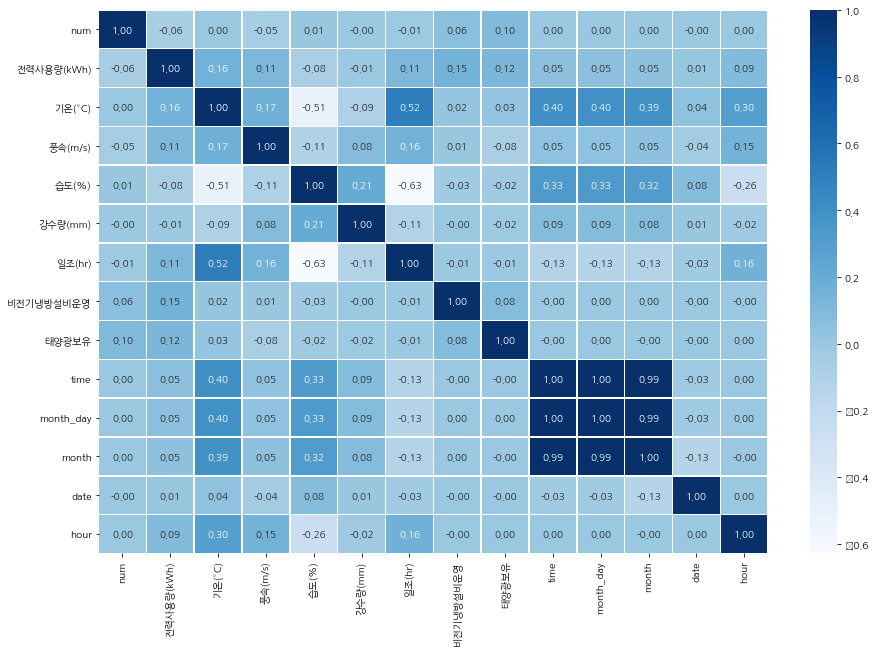

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams['font.family'] = 'NanumGothic'
plt.figure(figsize=(15,10))
sns.heatmap(data=df_train.corr(), annot=True, fmt ='.2f', linewidths=.5, cmap='Blues')
plt.show()

In [25]:
df_train.columns

Index(['num', 'date_time', '전력사용량(kWh)', '기온(°C)', '풍속(m/s)', '습도(%)',
       '강수량(mm)', '일조(hr)', '비전기냉방설비운영', '태양광보유', 'time', 'month_day', 'month',
       'date', 'hour', 'day'],
      dtype='object')

시간과 전력사용량 관계
--

[Text(0, 0.5, 'kWh'), Text(0.5, 1.0, 'month')]

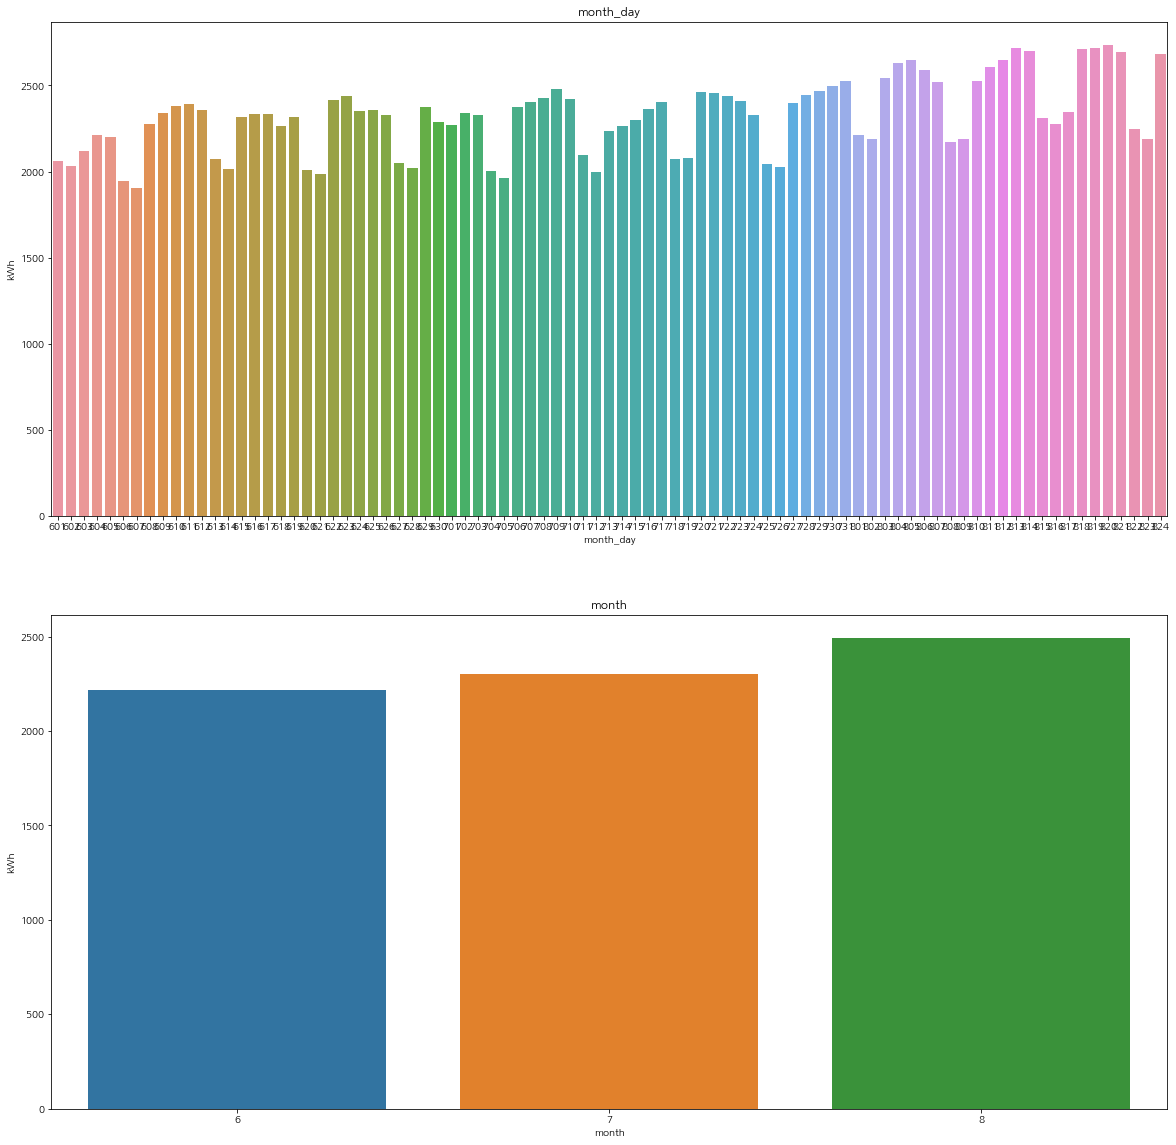

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt

figure, ((ax1), (ax2)) =plt.subplots(nrows=2,ncols=1)
figure.set_size_inches(20,20)

md=df_train.groupby('month_day')['전력사용량(kWh)'].mean().reset_index()
m=df_train.groupby('month')['전력사용량(kWh)'].mean().reset_index()

sns.barplot(data=md, x="month_day", y='전력사용량(kWh)', ax=ax1)

sns.barplot(data=m, x="month", y='전력사용량(kWh)', ax=ax2)

sns.set_style("darkgrid")
ax1.set(ylabel='kWh', title ="month_day")
ax2.set(ylabel='kWh', title ="month")

[Text(0, 0.5, 'kWh'), Text(0.5, 1.0, 'hour')]

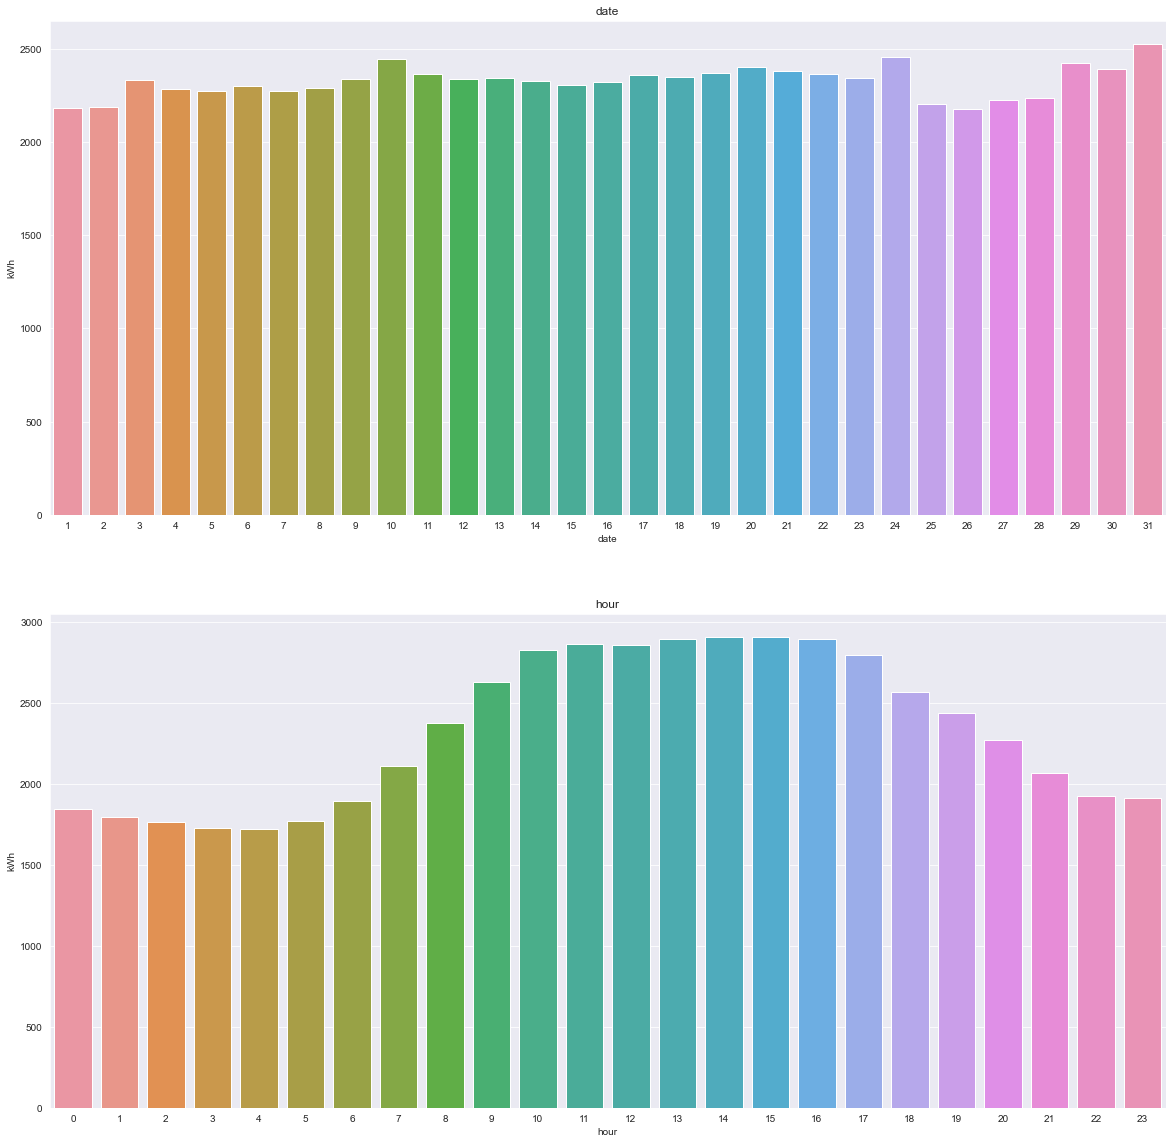

In [27]:
import seaborn as sns

figure, ( (ax3), (ax4)) =plt.subplots(nrows=2,ncols=1)
figure.set_size_inches(20,20)

date=df_train.groupby('date')['전력사용량(kWh)'].mean().reset_index()
h=df_train.groupby('hour')['전력사용량(kWh)'].mean().reset_index()

sns.barplot(data=date, x="date", y='전력사용량(kWh)', ax=ax3)

sns.barplot(data=h, x="hour", y='전력사용량(kWh)', ax=ax4)

ax3.set(ylabel='kWh', title ="date")
ax4.set(ylabel='kWh', title ="hour")

[Text(0, 0.5, 'kWh'), Text(0.5, 1.0, 'day')]

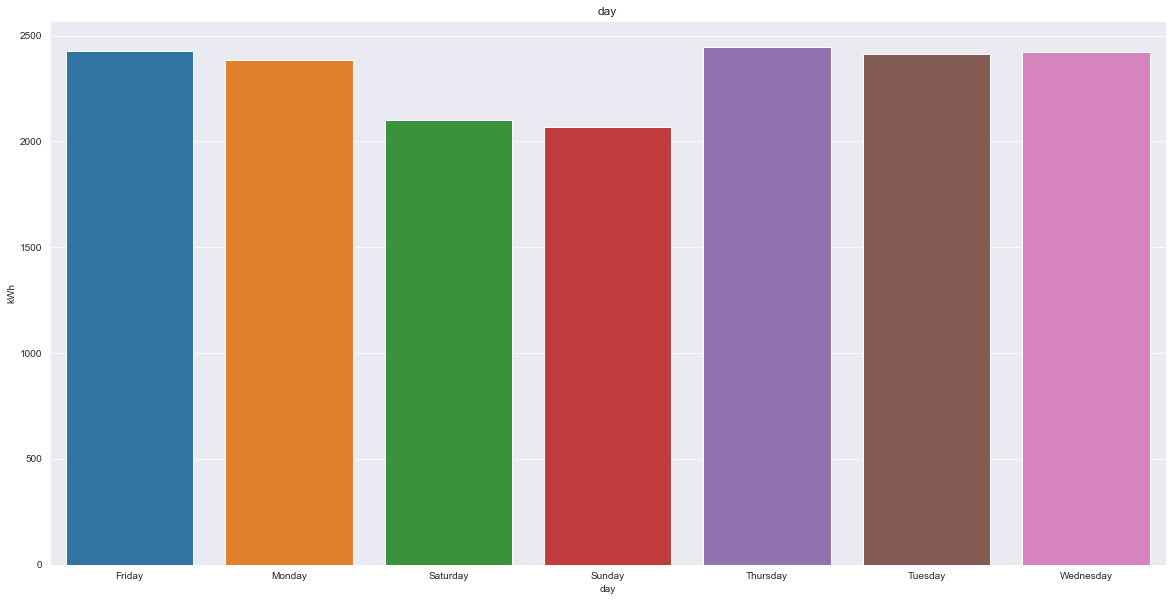

In [28]:
import seaborn as sns

figure, (ax5) =plt.subplots(nrows=1,ncols=1)
figure.set_size_inches(20,10)

day=df_train.groupby('day')['전력사용량(kWh)'].mean().reset_index()

sns.barplot(data=day, x="day", y='전력사용량(kWh)', ax=ax5)

sns.set_style("darkgrid")
ax5.set(ylabel='kWh', title ="day")

<AxesSubplot:xlabel='month_day', ylabel='전력사용량(kWh)'>

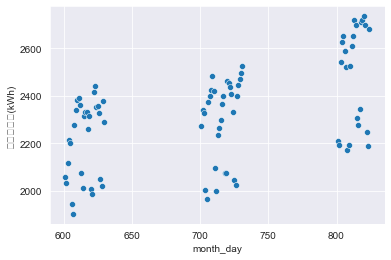

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.scatterplot(md.month_day, md['전력사용량(kWh)'])

기온과 전력사용량 관계
--

In [30]:
tem=df_train.groupby(['기온(°C)'])['전력사용량(kWh)' ].mean().reset_index()
tem

,기온(°C),전력사용량(kWh)
0,11.1,672.624
1,11.2,848.880
2,11.3,721.224
3,11.7,482.220
4,11.8,473.364
...,...,...
240,35.6,1767.312
241,35.7,1554.282
242,35.8,1748.304
243,36.0,1505.088


<AxesSubplot:xlabel='기온(°C)', ylabel='전력사용량(kWh)'>

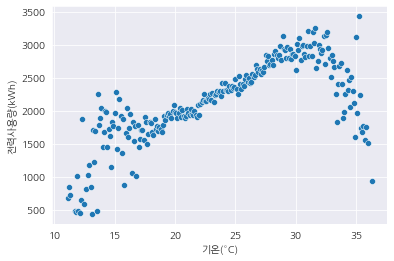

In [31]:
plt.rcParams['font.family'] = 'NanumGothic'

sns.scatterplot(tem['기온(°C)'],tem['전력사용량(kWh)'])

비전기냉방설비운영과 전력사용량 관계
--

In [32]:
Non_electric_cooling_equipment=df_train.groupby(['비전기냉방설비운영'])['전력사용량(kWh)' ].mean().reset_index()
Non_electric_cooling_equipment

,비전기냉방설비운영,전력사용량(kWh)
0,0.0,1868.722163
1,1.0,2536.198313


[Text(0, 0.5, 'kWH'), Text(0.5, 1.0, 'kWh and Non_electric_cooling_equipment')]

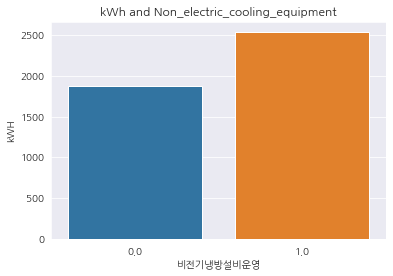

In [33]:
figure, (ax1) =plt.subplots(nrows=1,ncols=1)

plt.rcParams['font.family'] = 'NanumGothic'
sns.barplot(data=Non_electric_cooling_equipment, x='비전기냉방설비운영', y='전력사용량(kWh)', ax=ax1)

ax1.set(ylabel='kWH', title='kWh and Non_electric_cooling_equipment')

태양광보유와 전력사용량 관계
--

In [34]:
sunlight=df_train.groupby(['태양광보유'])['전력사용량(kWh)' ].mean().reset_index()
sunlight

,태양광보유,전력사용량(kWh)
0,0.0,2093.135722
1,1.0,2572.504986


[Text(0, 0.5, 'kWH'), Text(0.5, 1.0, 'kWh and sunlight')]

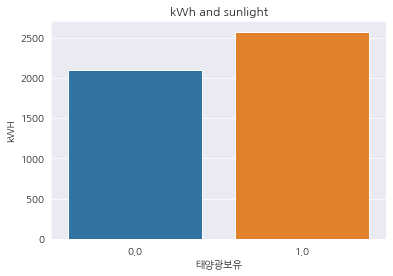

In [35]:
figure, (ax1) =plt.subplots(nrows=1,ncols=1)
plt.rcParams['font.family'] = 'NanumGothic'

sns.barplot(data=sunlight, x='태양광보유', y='전력사용량(kWh)', ax=ax1)

ax1.set(ylabel='kWH', title='kWh and sunlight')

나머지 변수들의 상관관계
--

건물번호와 전력사용량 관계
--

In [36]:
building_num=df_train.groupby(['num'])['전력사용량(kWh)'].sum().reset_index()

[Text(0, 0.5, 'kWH'), Text(0.5, 1.0, 'num and kWh')]

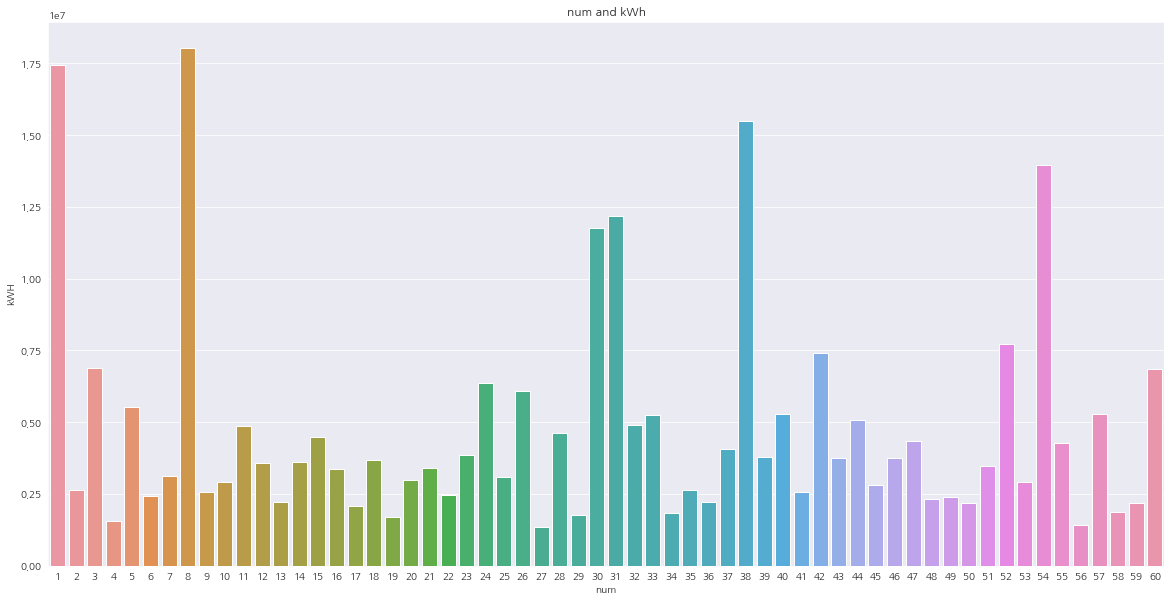

In [37]:
figure, (ax1) =plt.subplots(nrows=1,ncols=1)
figure.set_size_inches(20,10)

sns.barplot(data=building_num, x='num', y='전력사용량(kWh)', ax=ax1)

ax1.set(ylabel='kWH', title='num and kWh')

날짜와 시간 기준
--

In [38]:
tn1=df_train.groupby(['time'])['풍속(m/s)', '습도(%)',
       '강수량(mm)', '일조(hr)','전력사용량(kWh)'].mean().reset_index()

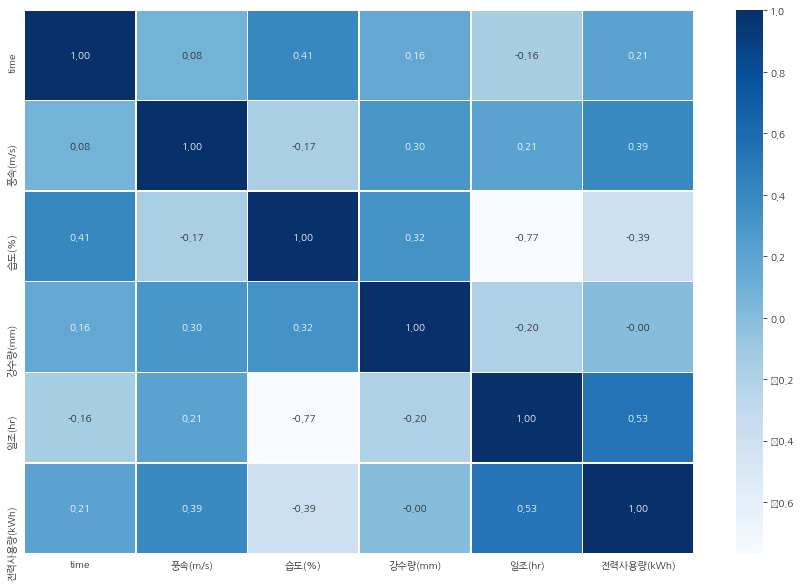

In [39]:
plt.figure(figsize=(15,10))
plt.rcParams['font.family'] = 'NanumGothic'
sns.heatmap(data=tn1.corr(), annot=True, fmt ='.2f', linewidths=.5, cmap='Blues')
plt.show()

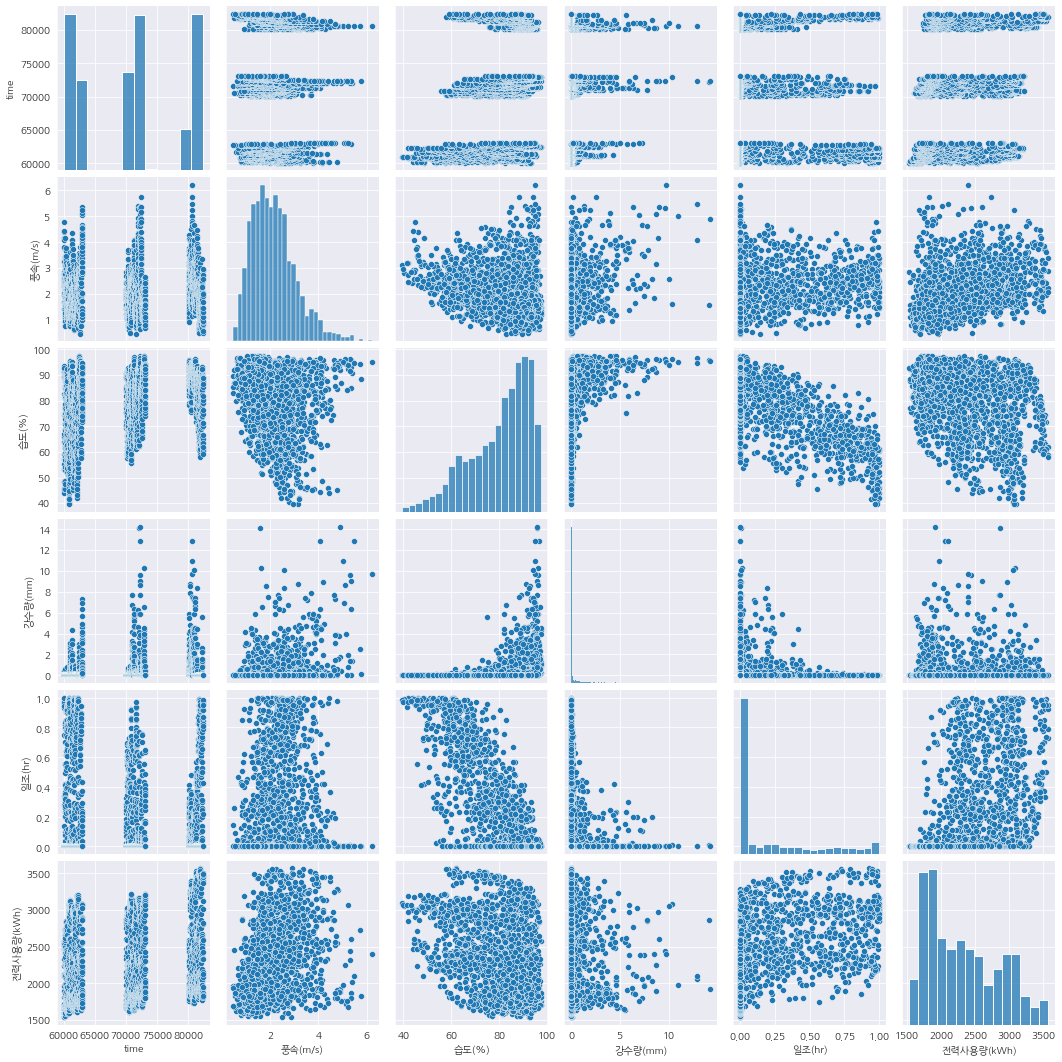

In [40]:
sns.pairplot(tn1)
plt.rcParams['font.family'] = 'NanumGothic'

회사별로 비교해보기
--

In [41]:
df_train.columns

Index(['num', 'date_time', '전력사용량(kWh)', '기온(°C)', '풍속(m/s)', '습도(%)',
       '강수량(mm)', '일조(hr)', '비전기냉방설비운영', '태양광보유', 'time', 'month_day', 'month',
       'date', 'hour', 'day'],
      dtype='object')

In [42]:
num_info=df_train.groupby(['num'])['기온(°C)','전력사용량(kWh)','풍속(m/s)','습도(%)','강수량(mm)',  '비전기냉방설비운영', '태양광보유'].mean().reset_index()
num_info.head()

,num,기온(°C),전력사용량(kWh),풍속(m/s),습도(%),강수량(mm),비전기냉방설비운영,태양광보유
0,1,24.608578,8543.273488,2.345980,75.971569,0.493873,0.0,0.0
1,2,23.623333,1299.914365,3.197990,81.113725,0.720098,1.0,0.0
2,3,24.241275,3371.353699,1.937402,82.667157,0.540882,1.0,1.0
3,4,25.143627,763.997353,2.056324,71.136275,0.393186,1.0,1.0
4,5,23.623333,2714.509694,3.197990,81.113725,0.720098,1.0,0.0


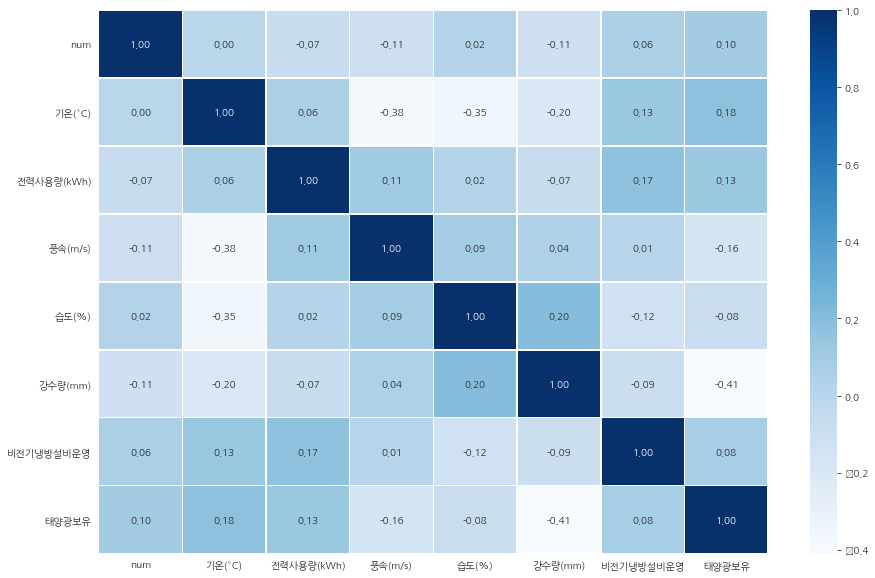

In [43]:
plt.figure(figsize=(15,10))
plt.rcParams['font.family'] = 'NanumGothic'
sns.heatmap(data=num_info.corr(), annot=True, fmt ='.2f', linewidths=.5, cmap='Blues')
plt.show()

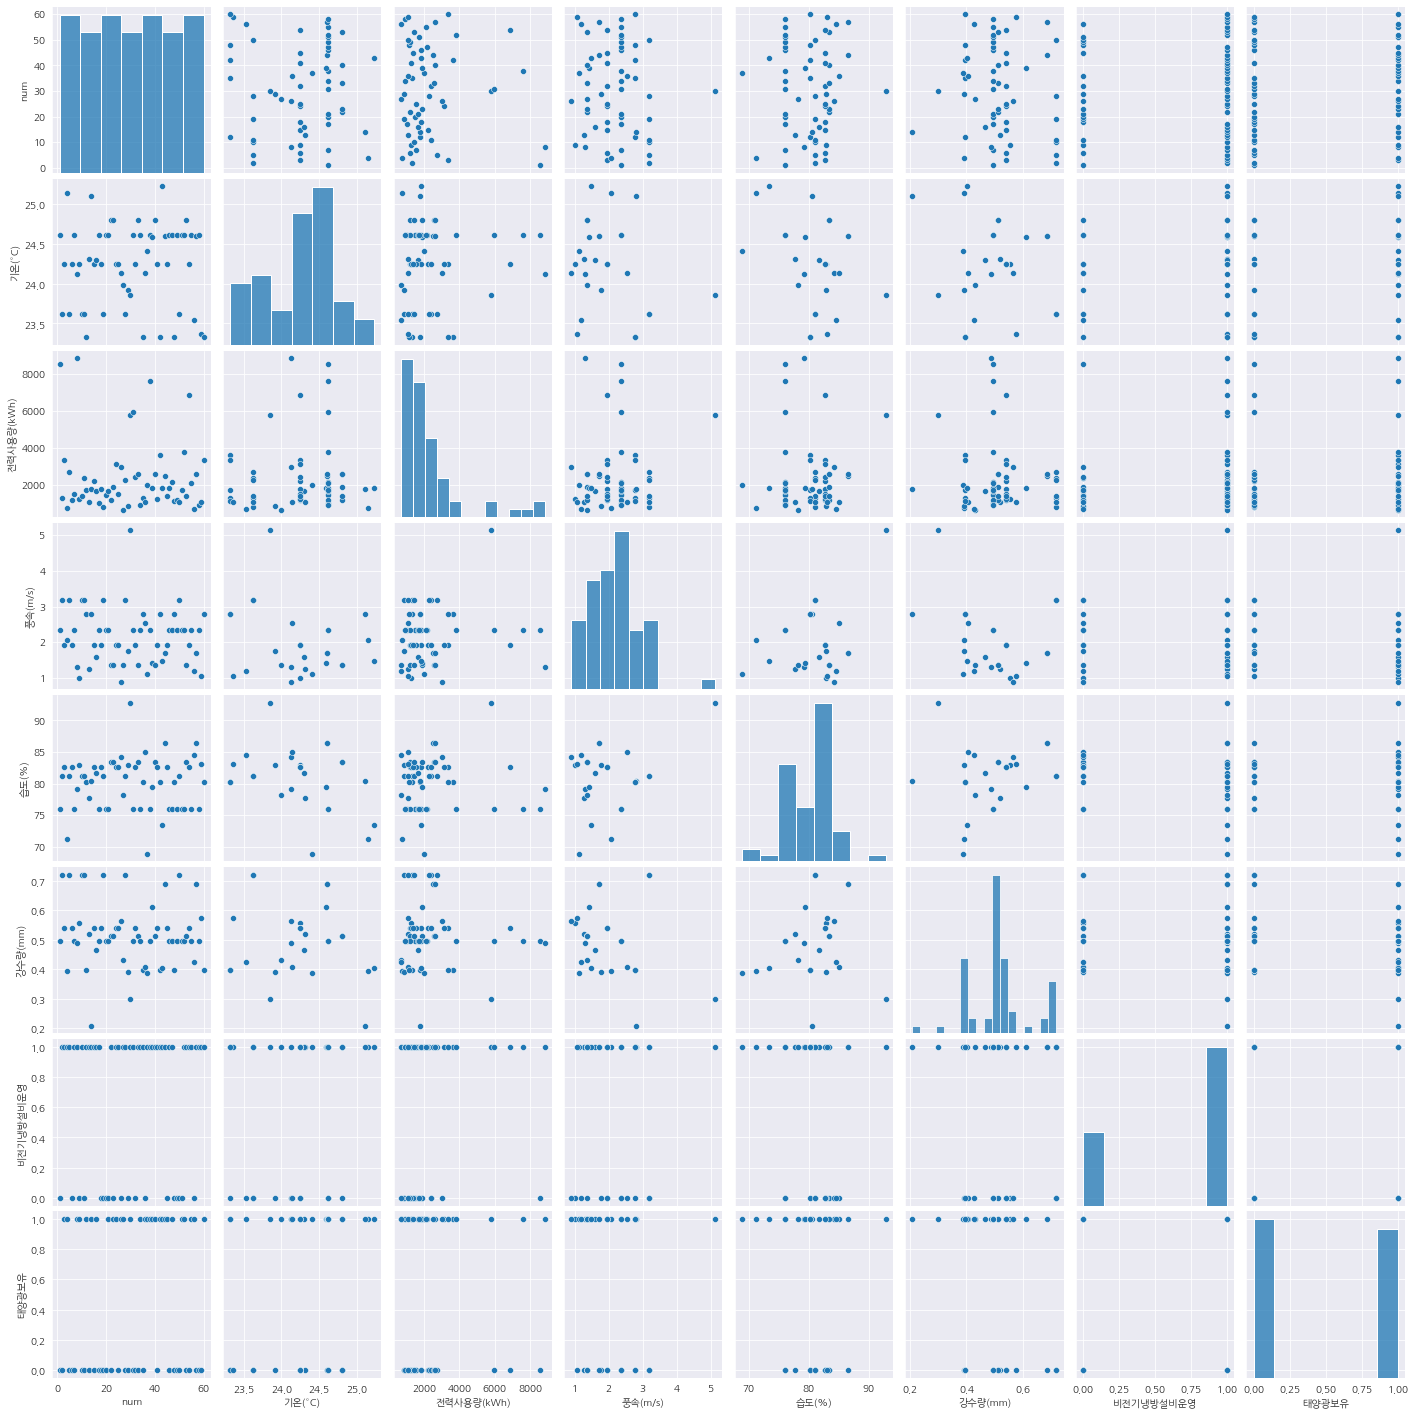

In [44]:
sns.pairplot(num_info)
plt.rcParams['font.family'] = 'NanumGothic'

Linear Regression
--

- train 데이터를 기준으로 마지막 7일 이전을 train, 마지막 7일을 test로 설정해준 뒤
- train 데이터와 test 데이터로 회귀분석을 진행합니다.

day label encoding

In [45]:
from sklearn import preprocessing

le=preprocessing.LabelEncoder()

df_train_encoded_day=le.fit_transform(df_train['day'])
np_day=df_train_encoded_day.reshape(-1,1)
day_1=map(lambda x: x[0], np_day)
day=pd.Series(day_1)

df_train['day']=day

In [46]:
from sklearn import preprocessing

le=preprocessing.LabelEncoder()

df_test_encoded_day=le.fit_transform(df_test['day'])
np_day=df_test_encoded_day.reshape(-1,1)
day_1=map(lambda x: x[0], np_day)
day=pd.Series(day_1)

df_test['day']=day

In [47]:
X=df_train.drop(['date_time', '전력사용량(kWh)'], axis=1)
y=df_train['전력사용량(kWh)']

train_1=df_train.loc[df_train['time']<=81723]
test_1=df_train.loc[df_train['time']>81723]
train_2=train_1.drop(['date_time'], axis=1)
test_2=test_1.drop(['date_time'],  axis=1)

train=train_2.drop(['전력사용량(kWh)'], axis=1)
test=test_2.drop(['전력사용량(kWh)'],  axis=1)
y_train=train_2['전력사용량(kWh)']
y_test=test_2['전력사용량(kWh)']

In [48]:
X_train=train
X_test=test

In [146]:
X_train

,num,기온(°C),풍속(m/s),습도(%),강수량(mm),일조(hr),비전기냉방설비운영,태양광보유,time,month_day,month,date,hour,day
0,1,17.6,2.5,92.0,0.8,0.0,0.0,0.0,60100,601,6,1,0,1
1,1,17.7,2.9,91.0,0.3,0.0,0.0,0.0,60101,601,6,1,1,1
2,1,17.5,3.2,91.0,0.0,0.0,0.0,0.0,60102,601,6,1,2,1
3,1,17.1,3.2,91.0,0.0,0.0,0.0,0.0,60103,601,6,1,3,1
4,1,17.0,3.3,92.0,0.0,0.0,0.0,0.0,60104,601,6,1,4,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
122227,60,28.0,1.2,81.0,0.0,0.9,1.0,1.0,81719,817,8,17,19,1
122228,60,26.8,2.1,86.0,0.0,0.0,1.0,1.0,81720,817,8,17,20,1
122229,60,26.0,2.1,92.0,0.0,0.0,1.0,1.0,81721,817,8,17,21,1
122230,60,25.8,1.0,87.0,0.0,0.0,1.0,1.0,81722,817,8,17,22,1


In [147]:
X_test

,num,기온(°C),풍속(m/s),습도(%),강수량(mm),일조(hr),비전기냉방설비운영,태양광보유,time,month_day,month,date,hour,day
1872,1,26.2,0.9,84.0,0.0,0.0,0.0,0.0,81800,818,8,18,0,5
1873,1,25.7,0.9,86.0,0.0,0.0,0.0,0.0,81801,818,8,18,1,5
1874,1,25.4,0.6,88.0,0.0,0.0,0.0,0.0,81802,818,8,18,2,5
1875,1,25.0,0.4,89.0,0.0,0.0,0.0,0.0,81803,818,8,18,3,5
1876,1,24.8,0.6,90.0,0.0,0.0,0.0,0.0,81804,818,8,18,4,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
122395,60,27.8,2.3,68.0,0.0,0.7,1.0,1.0,82419,824,8,24,19,1
122396,60,27.3,1.2,71.0,0.0,0.0,1.0,1.0,82420,824,8,24,20,1
122397,60,27.3,1.8,71.0,0.0,0.0,1.0,1.0,82421,824,8,24,21,1
122398,60,27.1,1.8,74.0,0.0,0.0,1.0,1.0,82422,824,8,24,22,1


In [148]:
y_train

0         8179.056
1         8135.640
2         8107.128
3         8048.808
4         8043.624
            ...   
122227    4261.248
122228    4202.064
122229    4036.608
122230    3850.416
122231    3297.888
Name: 전력사용량(kWh), Length: 112320, dtype: float64

In [149]:
y_test

1872      8690.976
1873      8672.184
1874      8645.616
1875      8583.408
1876      8562.672
            ...   
122395    4114.368
122396    3975.696
122397    3572.208
122398    3299.184
122399    3204.576
Name: 전력사용량(kWh), Length: 10080, dtype: float64

모델 적용해보기

In [49]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import mean_squared_error

reg_all=LinearRegression()
reg_all.fit(X_train, y_train)

LinearRegression()

In [50]:
import numpy as np

y_train_pred=reg_all.predict(X_train)
rmse=(np.sqrt(mean_squared_error(y_train, y_train_pred)))
r2=round(reg_all.score(X_train, y_train), 2)

print('rmse 는', format(rmse), '입니다.')
print('r2 는', format(r2), '입니다.')
print('train 스코어는', format(reg_all.score(X_train, y_train)), '입니다.')

rmse 는 1962.5857866847173 입니다.
r2 는 0.07 입니다.
train 스코어는 0.07405798886950676 입니다.


In [51]:
y_test_pred=reg_all.predict(X_test)
rmse=(np.sqrt(mean_squared_error(y_test, y_test_pred)))
r2=round(reg_all.score(X_test, y_test), 2)

print('rmse 점수는', format(rmse), '입니다.')
print('r2 점수는', format(r2), '입니다.')
print('test 스코어는', format(reg_all.score(X_test, y_test)), '입니다.')

rmse 점수는 2153.4419250532155 입니다.
r2 점수는 0.08 입니다.
test 스코어는 0.0839636988481508 입니다.


In [52]:
import statsmodels.api as sm

# 변수들에 상수항을 추가함
X_constant=sm.add_constant(X)

model_1=sm.OLS(y,X_constant)
lin_reg=model_1.fit()
lin_reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             전력사용량(kWh)   R-squared:                       0.076
Model:                            OLS   Adj. R-squared:                  0.076
Method:                 Least Squares   F-statistic:                     842.7
Date:                Thu, 20 May 2021   Prob (F-statistic):               0.00
Time:                        09:17:00   Log-Likelihood:            -1.1027e+06
No. Observations:              122400   AIC:                         2.205e+06
Df Residuals:                  122387   BIC:                         2.206e+06
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -918.2959     73.890    -12.428      0.000   -1063.119    -773.473
num           -9.3569      0.329    -28.433      0.000     -10.002      -8.712
기온(°C)        75.4972      2.936     25.718      0.000      69.743      81.251
풍속(m/s)      115.1868      3.874     29.735      0.000     107.594     122.779
습도(%)          7.5567      0.620     12.182      0.000       6.341       8.773
강수량(mm)       -2.0487      2.218     -0.924      0.356      -6.397       2.299
일조(hr)       349.9067     20.899     16.743      0.000     308.945     390.869
비전기냉방설비운영    641.4528     12.236     52.425      0.000     617.471     665.435
태양광보유        481.1327     11.455     42.003      0.000     458.681     503.584
time          -0.0009      0.001     -0.837      0.403      -0.003       0.001
month_day     -0.1355      0.009    -15.503      0.000      -0.153      -0.118
month         -0.0233      0.007     -3.395      0.001      -0.037      -0.010
date           2.1967      0.687      3.198      0.001       0.850       3.543
hour          13.5496      0.874     15.499      0.000      11.836      15.263
day           24.2586      2.838      8.547      0.000      18.696      29.821
==============================================================================
Omnibus:                    66710.759   Durbin-Watson:                   0.030
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           529088.674
Skew:                           2.555   Prob(JB):                         0.00
Kurtosis:                      11.811   Cond. No.                     1.14e+20
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 4.77e-26. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [53]:
coeff = pd.Series(data=np.round(reg_all.coef_, 1), index=X.columns )
coeff.sort_values(ascending=False)

비전기냉방설비운영    638.8
태양광보유        469.6
일조(hr)       291.4
풍속(m/s)      113.1
기온(°C)        76.2
day           25.2
hour          13.5
습도(%)          7.0
date           1.6
month         -0.0
time          -0.0
month_day     -0.1
강수량(mm)       -2.0
num           -9.4
dtype: float64

Text(0.5, 1.0, 'Feature Coeff')

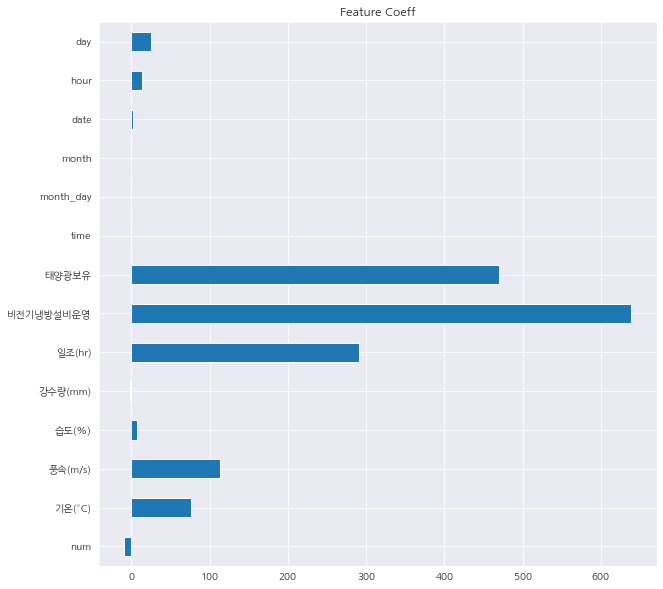

In [54]:
fia, ax=plt.subplots(figsize=(10,10))
coeff.plot.barh()

ax.set_title("Feature Coeff")

EDA 2
--

날짜 정보와 날씨 기준 EDA 이후 칼럼 만들기
--

날짜 정보: 'time', 'month_day', 'month', 'date', 'hour', 'day'

날씨 정보:  '기온(°C)',  '풍속(m/s)',  '습도(%)',  '강수량(mm)', '일조(hr)'

회사별로 날짜 별 기온 확인해보기
--

In [55]:
tem_table=pd.pivot_table(df_train, index='num'  , columns='month_day'  , values= '기온(°C)')
tem_table=tem_table.fillna(0)
tem_table.describe()

month_day,601,602,603,604,605,606,607,608,609,610,...,815,816,817,818,819,820,821,822,823,824
count,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,...,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000
mean,20.300417,18.881736,21.701111,22.760625,22.872569,23.151736,22.317708,24.224028,25.700764,25.429653,...,27.450556,27.813194,28.184514,27.785903,27.619931,27.924792,27.169097,25.727361,26.017639,27.634097
std,1.532636,1.561297,0.892132,1.832348,1.734588,1.437018,1.278749,1.143025,1.242311,0.949437,...,1.570301,0.885985,0.637076,0.932316,1.075958,0.923821,0.783692,1.016421,1.015121,0.671312
min,17.600000,16.720833,19.816667,18.991667,19.945833,19.870833,19.845833,21.058333,23.204167,22.666667,...,25.241667,26.208333,26.462500,26.179167,26.029167,26.525000,25.487500,24.400000,24.200000,26.033333
25%,19.091667,17.841667,21.291667,21.908333,21.562500,21.870833,21.387500,23.225000,24.651042,24.625000,...,26.100000,27.383333,28.183333,26.945833,26.645833,27.400000,26.608333,24.893750,25.020833,27.441667
50%,19.841667,17.900000,21.716667,22.316667,22.862500,23.150000,22.852083,24.200000,25.606250,25.466667,...,26.708333,27.575000,28.258333,27.541667,27.145833,27.554167,26.954167,25.462500,25.570833,27.529167
75%,21.432292,19.907292,21.841667,24.493750,24.104167,24.583333,22.879167,24.775000,26.604167,26.066667,...,28.767708,28.389583,28.416667,28.591667,28.837500,28.944792,27.437500,26.751042,26.958333,27.920833
max,23.962500,22.416667,24.137500,27.433333,26.416667,25.395833,24.508333,26.483333,28.683333,28.070833,...,31.737500,30.437500,29.641667,29.945833,30.458333,29.862500,29.133333,27.758333,28.120833,29.908333


In [56]:
tem_table.head()

month_day,601,602,603,604,605,606,607,608,609,610,...,815,816,817,818,819,820,821,822,823,824
num,,,,,,,,,,,,,,,,,,,,,
1,19.841667,17.900000,21.841667,21.908333,22.862500,24.583333,22.870833,24.775000,26.604167,26.066667,...,26.100000,27.383333,28.258333,27.541667,27.145833,27.554167,26.608333,24.400000,25.020833,27.529167
2,21.920833,21.212500,21.291667,22.620833,22.287500,21.004167,21.387500,23.225000,23.716667,24.625000,...,27.900000,28.062500,28.404167,28.591667,28.837500,29.437500,26.883333,26.858333,26.958333,27.920833
3,19.091667,17.841667,21.716667,22.316667,21.562500,23.150000,21.666667,23.854167,25.445833,25.466667,...,26.708333,27.575000,28.183333,26.945833,26.645833,27.400000,27.437500,25.462500,25.570833,27.441667
4,23.962500,22.416667,24.137500,27.433333,26.416667,21.233333,23.341667,26.483333,28.683333,28.070833,...,31.737500,30.437500,29.641667,29.945833,30.458333,29.862500,27.245833,26.879167,28.120833,28.562500
5,21.920833,21.212500,21.291667,22.620833,22.287500,21.004167,21.387500,23.225000,23.716667,24.625000,...,27.900000,28.062500,28.404167,28.591667,28.837500,29.437500,26.883333,26.858333,26.958333,27.920833


각 회사마다 지역에 따라 해당 날짜 온도 차이가 있음을 확인. 향후 지역별로 군집화 할 때 좋은 자료가 될 수도 있을 것이라고 추정

시간대별로 일조량 확인해보기
--

- 일출과 일몰 시간 확인

In [59]:
sun_table=pd.pivot_table(df_train, index='month_day'  , columns='hour'  , values= '일조(hr)')
sun_table=sun_table.fillna(0)
sun_table.describe()

hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
count,85.0,85.0,85.0,85.0,85.0,85.0,85.000000,85.000000,85.000000,85.000000,...,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000,85.0,85.0,85.0
mean,0.0,0.0,0.0,0.0,0.0,0.0,0.005373,0.147353,0.290118,0.352431,...,0.466922,0.477294,0.473588,0.440020,0.396725,0.284314,0.040451,0.0,0.0,0.0
std,0.0,0.0,0.0,0.0,0.0,0.0,0.015007,0.186096,0.273396,0.296448,...,0.338589,0.346387,0.342443,0.350433,0.354469,0.303675,0.084529,0.0,0.0,0.0
min,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0
25%,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.008333,0.068333,0.076667,...,0.186667,0.126667,0.188333,0.101667,0.046667,0.018333,0.000000,0.0,0.0,0.0
50%,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.086667,0.221667,0.298333,...,0.433333,0.500000,0.443333,0.383333,0.255000,0.133333,0.000000,0.0,0.0,0.0
75%,0.0,0.0,0.0,0.0,0.0,0.0,0.001667,0.220000,0.431667,0.565000,...,0.731667,0.781667,0.781667,0.798333,0.736667,0.538333,0.026667,0.0,0.0,0.0
max,0.0,0.0,0.0,0.0,0.0,0.0,0.085000,0.903333,0.963333,0.996667,...,1.000000,1.000000,0.998333,1.000000,0.995000,0.945000,0.305000,0.0,0.0,0.0


In [60]:
sun_table.head()

hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
month_day,,,,,,,,,,,,,,,,,,,,,
601,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.138333,0.336667,0.745000,...,0.963333,0.980000,0.966667,0.995000,0.995000,0.945000,0.278333,0.0,0.0,0.0
602,0.0,0.0,0.0,0.0,0.0,0.0,0.033333,0.231667,0.271667,0.365000,...,0.416667,0.553333,0.415000,0.255000,0.255000,0.096667,0.000000,0.0,0.0,0.0
603,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.075000,0.270000,0.195000,...,0.815000,0.825000,0.836667,0.798333,0.785000,0.611667,0.003333,0.0,0.0,0.0
604,0.0,0.0,0.0,0.0,0.0,0.0,0.003333,0.111667,0.221667,0.393333,...,0.918333,0.745000,0.531667,0.510000,0.556667,0.223333,0.000000,0.0,0.0,0.0
605,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.093333,0.278333,0.400000,...,0.935000,0.933333,0.945000,0.901667,0.828333,0.180000,0.000000,0.0,0.0,0.0


지역 차이에 따른 일출, 일몰 시각 혹은 날씨에 따라 일조량의 차이가 있을 것이라고 추측

In [61]:
sun_table2=pd.pivot_table(df_train, index='num'  , columns='hour'  , values= '일조(hr)')
sun_table2=sun_table2.fillna(0)
sun_table2.describe()

hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
count,60.0,60.0,60.0,60.0,60.0,60.0,60.000000,60.000000,60.000000,60.000000,...,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.0,60.0,60.0
mean,0.0,0.0,0.0,0.0,0.0,0.0,0.005373,0.147353,0.290118,0.352431,...,0.466922,0.477294,0.473588,0.440020,0.396725,0.284314,0.040451,0.0,0.0,0.0
std,0.0,0.0,0.0,0.0,0.0,0.0,0.009765,0.042500,0.053579,0.062138,...,0.053579,0.052377,0.053486,0.055399,0.047943,0.050776,0.032746,0.0,0.0,0.0
min,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.065882,0.202353,0.260000,...,0.395294,0.412941,0.384706,0.368235,0.332941,0.080000,0.000000,0.0,0.0,0.0
25%,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.122353,0.266176,0.297647,...,0.420882,0.419118,0.416471,0.374412,0.332941,0.249118,0.009118,0.0,0.0,0.0
50%,0.0,0.0,0.0,0.0,0.0,0.0,0.001176,0.136471,0.280588,0.334118,...,0.477059,0.487059,0.473529,0.447647,0.408235,0.287059,0.032941,0.0,0.0,0.0
75%,0.0,0.0,0.0,0.0,0.0,0.0,0.007353,0.185882,0.304706,0.377941,...,0.497647,0.507059,0.516471,0.490294,0.431765,0.331765,0.064706,0.0,0.0,0.0
max,0.0,0.0,0.0,0.0,0.0,0.0,0.058824,0.341176,0.455294,0.508235,...,0.571765,0.576471,0.588235,0.528235,0.477647,0.376471,0.115294,0.0,0.0,0.0


In [62]:
sun_table2.head()

hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
num,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.136471,0.268235,0.297647,...,0.395294,0.412941,0.416471,0.368235,0.332941,0.287059,0.064706,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.188235,0.368235,0.457647,...,0.497647,0.507059,0.498824,0.511765,0.421176,0.247059,0.000000,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.001176,0.122353,0.292941,0.334118,...,0.482353,0.503529,0.516471,0.470588,0.431765,0.331765,0.032941,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.028235,0.236471,0.371765,0.462353,...,0.483529,0.468235,0.478824,0.431765,0.396471,0.248235,0.028235,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.188235,0.368235,0.457647,...,0.497647,0.507059,0.498824,0.511765,0.421176,0.247059,0.000000,0.0,0.0,0.0


In [63]:
sun_table2[6].unique() #회사의 개수는 60, #15, 4개의 군집

array([0.        , 0.00117647, 0.02823529, 0.00235294, 0.00823529,
       0.01058824, 0.03294118, 0.01176471, 0.00705882, 0.01882353,
       0.05882353, 0.00588235, 0.01764706, 0.00352941, 0.00352941])

In [64]:
sun_table[20].unique() # 회사의 개수는 60, #30, 2개의 군집

array([0.27833333, 0.        , 0.00333333, 0.00833333, 0.02333333,
       0.03333333, 0.03666667, 0.20666667, 0.04      , 0.00166667,
       0.255     , 0.27833333, 0.285     , 0.23833333, 0.02666667,
       0.02666667, 0.26833333, 0.02      , 0.005     , 0.055     ,
       0.23      , 0.06      , 0.10166667, 0.165     , 0.305     ,
       0.24333333, 0.04666667, 0.06833333, 0.01666667, 0.05166667])

향후에 회사를 구역별로 나눌 때 도움이 될 것이라고 판단

이상기후 찾아보기
--


기상청 날씨누리 기상특보 발표기준: 

https://www.weather.go.kr/weather/warning/standard.jsp

기상청 기상자료개방포털:

https://data.kma.go.kr/climate/windChill/selectWindChillChart.do?pgmNo=111

강풍특보
--

주의보: 풍속 14m/s

경보: 풍속 21m/s

In [65]:
df_train.columns

Index(['num', 'date_time', '전력사용량(kWh)', '기온(°C)', '풍속(m/s)', '습도(%)',
       '강수량(mm)', '일조(hr)', '비전기냉방설비운영', '태양광보유', 'time', 'month_day', 'month',
       'date', 'hour', 'day'],
      dtype='object')

In [184]:
df_train['강풍특보']=df_train['풍속(m/s)']

In [185]:
df_train

,num,date_time,전력사용량(kWh),기온(°C),풍속(m/s),습도(%),강수량(mm),일조(hr),비전기냉방설비운영,태양광보유,...,month_day,month,date,hour,day,호우,강풍,체감온도,풍속(km/h),강풍특보
0,1,2020-06-01 00:00:00,8179.056,17.6,2.5,92.0,0.8,0.0,0.0,0.0,...,601,6,1,0,1,0.0,0.0,17.6,2.5,2.5
1,1,2020-06-01 01:00:00,8135.640,17.7,2.9,91.0,0.3,0.0,0.0,0.0,...,601,6,1,1,1,0.0,0.0,17.7,2.9,2.9
2,1,2020-06-01 02:00:00,8107.128,17.5,3.2,91.0,0.0,0.0,0.0,0.0,...,601,6,1,2,1,0.0,0.0,17.5,3.2,3.2
3,1,2020-06-01 03:00:00,8048.808,17.1,3.2,91.0,0.0,0.0,0.0,0.0,...,601,6,1,3,1,0.0,0.0,17.1,3.2,3.2
4,1,2020-06-01 04:00:00,8043.624,17.0,3.3,92.0,0.0,0.0,0.0,0.0,...,601,6,1,4,1,0.0,0.0,17.0,3.3,3.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
122395,60,2020-08-24 19:00:00,4114.368,27.8,2.3,68.0,0.0,0.7,1.0,1.0,...,824,8,24,19,1,0.0,0.0,27.8,2.3,2.3
122396,60,2020-08-24 20:00:00,3975.696,27.3,1.2,71.0,0.0,0.0,1.0,1.0,...,824,8,24,20,1,0.0,0.0,27.3,1.2,1.2
122397,60,2020-08-24 21:00:00,3572.208,27.3,1.8,71.0,0.0,0.0,1.0,1.0,...,824,8,24,21,1,0.0,0.0,27.3,1.8,1.8
122398,60,2020-08-24 22:00:00,3299.184,27.1,1.8,74.0,0.0,0.0,1.0,1.0,...,824,8,24,22,1,0.0,0.0,27.1,1.8,1.8


In [186]:
i=0

for i in range(0,122400):
    wind=df_train.loc[i, '풍속(m/s)']
    if wind >=21:
        df_train['강풍특보'][i]=2.0
    elif 21>wind >=14:
        df_train['강풍특보'][i]=1.0
    else:
        df_train['강풍특보'][i]=0.0
    
    i+=1        

In [187]:
df_train['강풍특보'].unique()

array([0., 1.])

In [188]:
Typhoon_warning=df_train.loc[df_train['강풍특보']==1]

print('강풍주의보가 발령된 횟수는', len(df_train.loc[df_train['강풍특보']==1]), '번 입니다')
print('강풍 주의보가 발령된 건물번호는', Typhoon_warning.num.unique(), '입니다.')
print('강풍 주의보가 발령된 시간은', Typhoon_warning.time.unique(), '입니다.')

강풍주의보가 발령된 횟수는 31 번 입니다
강풍 주의보가 발령된 건물번호는 [30] 입니다.
강풍 주의보가 발령된 시간은 [62920 62922 62923 63000 63001 63002 63003 63004 72319 72321 72322 72323
 72400 72401 72402 72403 72406 72407 72408 72409 72410 72411 72412 72413
 72414 72415 72416 72417 72418 72419 72502] 입니다.


호우특보
--


호우 주의보:

- 3시간 누적 강우량이 60mm 이상 예상되거나,

- 12시간 누적 강우량이 110mm 이상 예상될 때,

호우 경보:

- 3시간 누적강우량이 90mm 이상 예상 되거나

- 12시간 누적강우량이 180mm  이상 예상될 때


현재 데이터에는 강수량(mm,6시간)으로 되어있으므로

- 6시간 누적 강우량이 76mm이상일 시, 호우 주의보

- 6시간 누적 가우량이 120mm이상일 시, 호우 특보 발령

In [189]:
df_train['호우특보']=df_train['강수량(mm)']

In [202]:
i=0

for i in range(0,122400):
    a=df_train.loc[i, '강수량(mm)']
    
    if a<76:
        df_train['호우특보'][i]=0
    elif 76<= a <120:
        df_train['호우특보'][i]=1
    else:
        df_train['호우특보'][i]=2
        
    i+=1

In [206]:
df_train['호우특보'].unique()

array([0., 1.])

In [207]:
print('호우주의보가 발령된 횟수는', len(df_train.loc[df_train['호우특보']==1]), '번 입니다')

호우주의보가 발령된 횟수는 2 번 입니다


In [208]:
Heavy_rain_advisory =df_train.loc[df_train['호우특보']==1]

print('호우주의보가 발령된 횟수는', len(df_train.loc[df_train['호우특보']==1]), '번 입니다')
print('호우 주의보가 발령된 건물번호는', Heavy_rain_advisory.num.unique(), '입니다.')
print('호우 주의보가 발령된 시간은', Heavy_rain_advisory.time.unique(), '입니다.')

호우주의보가 발령된 횟수는 2 번 입니다
호우 주의보가 발령된 건물번호는 [44 57] 입니다.
호우 주의보가 발령된 시간은 [80807] 입니다.


체감온도 구하기
--

체감온도 = 13.12 + 0.6215T - 11.37 V0.16 + 0.3965 V0.16T

T : 기온((°C))

V : 풍속(km/h)

출처: https://www.sciencetimes.co.kr/news/%EC%B2%B4%EA%B0%90%EC%98%A8%EB%8F%84%EC%99%80-%EC%8B%A4%EC%A0%9C-%EC%98%A8%EB%8F%84%EB%8A%94-%EC%96%B4%EB%96%BB%EA%B2%8C-%EB%8B%A4%EB%A5%B8%EA%B0%80/

풍속(m/s)를 풍속(km/h)로 바꿔주기

- 1 m/s = (1/1000)/(1/3600)*km/hr = 3600/1000km/hr = 18/5 km/hr

In [176]:
df_train['풍속(km/h)']=df_train['풍속(m/s)']

In [177]:
i=0
for i in range(0,122400):
    Vs=df_train.loc[i]['풍속(m/s)']
    Vh=Vs*18/5
    df_train.loc[i]['풍속(km/h)']= Vh
    i+=1    

In [178]:
df_train['풍속(km/h)']

0         2.5
1         2.9
2         3.2
3         3.2
4         3.3
         ... 
122395    2.3
122396    1.2
122397    1.8
122398    1.8
122399    2.6
Name: 풍속(km/h), Length: 122400, dtype: float64

체감온도 칼럼 만들어 주기
--

In [179]:
df_train['체감온도']=df_train['기온(°C)']

In [180]:
i=0
for i in range(0,122400):
    T=df_train.loc[i]['기온(°C)']
    V=df_train.loc[i]['풍속(km/h)']
    Perceived_temperature=13.12+(0.6215*T)-((11.37*V)*0.16)+((0.3965*V)*0.16*T)
    df_train.loc[i]['체감온도']= Perceived_temperature
    i+=1    

In [181]:
df_train['체감온도']

0         17.6
1         17.7
2         17.5
3         17.1
4         17.0
          ... 
122395    27.8
122396    27.3
122397    27.3
122398    27.1
122399    27.1
Name: 체감온도, Length: 122400, dtype: float64

폭염 관련 정보
--

폭염일수
--

폭염일수는 일 최고기온이 33도 이상인 날의 수를 의미합니다.

In [303]:
df_train['폭염일수']=0

In [304]:
i=0

for i in range(0,122400):
    tem=df_train.loc[i, '기온(°C)']
    if tem >=33:
        df_train['폭염일수'][i]=1
    else:
        df_train['폭염일수'][i]=0
    
    i+=1  

In [343]:
hot_summer=df_train.loc[df_train['폭염일수']==1]
hot_summer

,num,date_time,전력사용량(kWh),기온(°C),풍속(m/s),습도(%),강수량(mm),일조(hr),비전기냉방설비운영,태양광보유,...,month_day,month,date,hour,day,체감온도,풍속(km/h),강풍특보,호우특보,폭염일수
303,1,2020-06-13 15:00:00,8572.39200,33.1,3.7,33.0,0.0,1.0,0.0,0.0,...,613,6,13,15,2,33.1,3.7,0.0,0.0,1
304,1,2020-06-13 16:00:00,8600.90400,33.0,2.9,38.0,0.0,1.0,0.0,0.0,...,613,6,13,16,2,33.0,2.9,0.0,0.0,1
518,1,2020-06-22 14:00:00,8710.41600,33.7,3.1,33.0,0.0,1.0,0.0,0.0,...,622,6,22,14,1,33.7,3.1,0.0,0.0,1
519,1,2020-06-22 15:00:00,8726.61600,35.2,2.5,30.0,0.0,1.0,0.0,0.0,...,622,6,22,15,1,35.2,2.5,0.0,0.0,1
520,1,2020-06-22 16:00:00,8737.63200,35.2,3.5,27.0,0.0,1.0,0.0,0.0,...,622,6,22,16,1,35.2,3.5,0.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
120253,59,2020-08-20 13:00:00,1696.14000,33.2,1.0,44.0,0.0,1.0,1.0,0.0,...,820,8,20,13,4,33.2,1.0,0.0,0.0,1
120254,59,2020-08-20 14:00:00,1781.67600,34.2,1.6,43.0,0.0,1.0,1.0,0.0,...,820,8,20,14,4,34.2,1.6,0.0,0.0,1
120255,59,2020-08-20 15:00:00,1696.29525,34.2,1.5,51.0,0.0,1.0,1.0,0.0,...,820,8,20,15,4,34.2,1.5,0.0,0.0,1
120256,59,2020-08-20 16:00:00,1765.15200,34.1,2.6,55.0,0.0,1.0,1.0,0.0,...,820,8,20,16,4,34.1,2.6,0.0,0.0,1


In [344]:
hot_summer.num

303        1
304        1
518        1
519        1
520        1
          ..
120253    59
120254    59
120255    59
120256    59
120257    59
Name: num, Length: 673, dtype: int64

In [367]:
hot_summer.month_day

303       613
304       613
518       622
519       622
520       622
         ... 
120253    820
120254    820
120255    820
120256    820
120257    820
Name: month_day, Length: 673, dtype: int32

In [377]:
strnum_1=pd.Series(hot_summer['num'], dtype=str)
strmonthday_1=pd.Series(hot_summer['month_day'], dtype=str)

In [379]:
a=pd.concat([strnum_1+strmonthday_1], axis=1)

In [375]:
strnum=pd.Series(df_train['num'], dtype=str)
strmonthday=pd.Series(df_train['month_day'], dtype=str)

In [380]:
b=pd.concat([strnum+strmonthday], axis=1)

In [393]:
i=0

for i in range(0,122400):
    if b[0].values[i] in a[0].values:
        df_train['폭염일수'][i]=1
    else:
        df_train['폭염일수'][i]=0
        
        i+=1

In [395]:
df_train['폭염일수'].unique()

array([0, 1], dtype=int64)

폭염특보
--


2020년 5월 15일 부터 아래의 기준으로 시범 운영

폭염 주의보:

1.일 최고체감 온도 33도 이상인 상태가 2일 이상으로 지속 될 것으로 예상될 때,

2.급격한 체감온도 상승 또는 폭염 장기화 등으로 중대한 피해발생이 예상 될 때

폭염 경보:

1.일 최고기온이 35도 이상인 상태가 2일 이상 지속될 것으로 예상 될 때,

2.급격한 체감온도 상승 또는 폭염 장기화 등으로 광범위한 지역에서 중대한 피해발생이 예상 될 때.

- 일 최고 체감온도가 2일 이상 33도 이상일 경우 해당 일을 폭염 주의보로 발령하며

- 일 최고 체감온도가 2일 이상 35도 이상일 경우 해당 일을 폭염 경보로 발령하겠습니다,

In [422]:
powerfever=df_train.groupby(['month_day'])['체감온도'].max().reset_index()
powerfever

,month_day,체감온도
0,601,30.2
1,602,29.4
2,603,30.5
3,604,35.0
4,605,33.7
...,...,...
80,820,36.0
81,821,33.9
82,822,32.8
83,823,32.3


In [423]:
superpowerfever=powerfever.loc[powerfever['체감온도']>=33]

In [424]:
superpowerfever

,month_day,체감온도
3,604,35.0
4,605,33.7
7,608,34.6
8,609,36.3
9,610,35.3
12,613,33.1
21,622,35.2
22,623,33.6
48,719,34.3
61,801,33.3


- 이틀이상 33도를 넘은 날은, ( 6월 4일,6월 5일), (6월 8일,6월 10일), (6월 22일,6월 23일),  (8월 1일,8월2일), (8월 4일,8월 5일), (8월 11일,8월21일)


In [425]:
supersuperpowerfever=powerfever.loc[powerfever['체감온도']>=35]

In [426]:
supersuperpowerfever

,month_day,체감온도
3,604,35.0
8,609,36.3
9,610,35.3
21,622,35.2
73,813,35.5
74,814,35.6
75,815,35.7
76,816,35.8
78,818,35.7
79,819,35.5


- 이틀이상 35도를 넘은 날은, (6월 9일,6월 10일), (8월 13일,8월 20일)

- 폭염 주의보 발령: 6월 5일, 6월 9일, 6월 23일, 8월 2일, 8월 5일, 8월 12일, 8월 13일
    
- 폭염 경보 발령: 6월 10일, 8월 14일부터 8월 21일

In [429]:
df_train['폭염특보']=df_train['폭염일수']
df_train['폭염특보']=0

In [431]:
i=0

for i in range(0,122400):
    if df_train.loc[i]['month_day']==605:
        df_train['폭염특보'][i]=1
    elif df_train.loc[i]['month_day']==609:
        df_train['폭염특보'][i]=1
    elif df_train.loc[i]['month_day']==623:
        df_train['폭염특보'][i]=1
    elif df_train.loc[i]['month_day']==802:
        df_train['폭염특보'][i]=1
    elif df_train.loc[i]['month_day']==805:
        df_train['폭염특보'][i]=1
    elif df_train.loc[i]['month_day']==812:
        df_train['폭염특보'][i]=1
    elif df_train.loc[i]['month_day']==813:
        df_train['폭염특보'][i]=1
    elif df_train.loc[i]['month_day']==610:
        df_train['폭염특보'][i]=2
    elif df_train.loc[i]['month_day']==814:
        df_train['폭염특보'][i]=2
    elif df_train.loc[i]['month_day']==815:
        df_train['폭염특보'][i]=2 
    elif df_train.loc[i]['month_day']==816:
        df_train['폭염특보'][i]=2
    elif df_train.loc[i]['month_day']==817:
        df_train['폭염특보'][i]=2  
    elif df_train.loc[i]['month_day']==818:
        df_train['폭염특보'][i]=2  
    elif df_train.loc[i]['month_day']==819:
        df_train['폭염특보'][i]=2  
    elif df_train.loc[i]['month_day']==820:
        df_train['폭염특보'][i]=2  
    elif df_train.loc[i]['month_day']==821:
        df_train['폭염특보'][i]=2  
    else:
        df_train['폭염특보'][i]=0  

In [433]:
df_train['폭염특보'].unique()

array([0, 1, 2], dtype=int64)

열지수 구하기
--

열지수는 기온과 습도에 따른 사람이 실제로 느끼는 더위를 지수화한 것임.

In [489]:
df_train['열지수']=0

In [493]:
i=0

for i in range(0,122400):
    Tc=df_train.loc[i, '기온(°C)']
    T=(Tc*1.8)+32
    R=df_train.loc[i, '습도(%)']*1/100
    
    h1= -42.379
    h2=2.04901523*T
    h3=10.14333127*R
    h4=-0.22475541*T*R
    h5=-6.83783*(pow(10, -3))*((pow(T, 2)))
    h6=-5.481717*(pow(10, -2))*(pow(R, 2))
    h7=1.22874*(pow(10,-3))*T*R
    h8=8.5282*(pow(10, -4))*T*(pow(R, 2))
    h9=-1.99*(pow(10, -6))*(pow(T, 2))*(pow(R, 2))
    
    Heat_index=h1+h2+h3+h4+h5+h6+h7+h8+h9
    
    df_train['열지수'][i]=Heat_index
    i+=1

In [494]:
df_train['열지수'].describe()

count    122400.000000
mean         67.420784
std           5.769414
min          44.000000
25%          63.000000
50%          67.000000
75%          71.000000
max          89.000000
Name: 열지수, dtype: float64

열지수

위험: 66이상

매우높음: 54이상 66미만

높음: 41이상 54미만

보통: 32이상 41미만

낮음: 32미만

불쾌지수 구하기
--

산출 방법: 9/5T -0.55(1-RH)(9/5T-26)+32

T: 기온(섭씨), RH: 상대습도

- 80이상: 매우 높음
- 75~80미만: 높음
- 68~75미만: 보통
- 68미만: 낮음

출처: https://www.kma.go.kr/HELP/basic/help_01_05.jsp

In [476]:
df_train['불쾌지수']=0

In [478]:
df_train.loc[1, '불쾌지수']

0

In [485]:
i=0

for i in range(0,122400):
    T=df_train.loc[i, '기온(°C)']
    RH=df_train.loc[i, '습도(%)']*1/100
    
    Discomfort_index= (9/5)*T -0.55*(1-RH)*(9/5*T-26)+32
    
    df_train['불쾌지수'][i]=Discomfort_index
    i+=1

In [486]:
df_train['불쾌지수'].describe()

count    122400.000000
mean         72.965106
std           4.781605
min          52.000000
25%          70.000000
50%          73.000000
75%          77.000000
max          86.000000
Name: 불쾌지수, dtype: float64

불쾌지수

- 매우높음: 80이상

- 높음: 75이상 80미만

- 보통 68~75미만

- 낮음: 68미만

냉방도일 구하기
--

냉방도일 값이 크다는 것은 기후가 덥고 냉방을 위해 전력이 많이 소모된다는 것을 의미합니다.

최고 기온과 최저 기온의 평균값이 기준온도보다 낮을 경우에는 최고기온과 기준온도도를 4를 나눈 값이 냉방도일이 되며, 최저기온이 기준온도 이하일 경우에는 최대온도오 기준온도의 차이값을 2로 나눈 값과 기준온도와 최저온도값을 4로 나눈 값의 차이값이 냉방도일이 된다.

일별로 산출한 Dc 값을 월단위로 합산한 후, Dc값이 0 이 아닌날을 월별로 합산하여 나눈 값을 의미합니다.

날씨의 덥고 추운 정도를 표시하는 지수이다. 매일의 일평균기온과 기준온도의 차이를 일 년동안 누적 합산하여, 일평균기온이 기준온도보다 높은 경우는 냉방도일로, 낮은 경우는 난방도일로 계산한다. 우리나라에서는 냉방도일의 기준온도를 26℃, 난방도일의 기준온도를 18℃로 정해놓고 있다. 난방도일 값이 크다는 것은 기후가 춥다는 것과 난방을 위해 연료비가 많이 드는 것을 의미하며, 냉방도일 값이 크다는 것은 기후가 덥고 냉방을 위해 전력이 많이 소모된다는 것을 의미한다.


1. Tmax < Tbase

Dc=0

2. (Tmax+Tmin)/2 < Tbase, 

Dc = (Tmax-Tbase)/4

3. Tmin <= Tbase 

Dc = (Tmax-Tbase)/2 - (Tbase-Tmin)/4

4. Tmin > Tbase

Dc= (Tmax+Tmin)/2 - Tbase

위의 공식에 의해 일별로 산출한 Dc 값을 월 단위로 합산한후, Dc값이 0이 아닌 날을 월별로 합산하여 나눈 값을 의미합니다.

In [509]:
df_train['Dc']=0

In [503]:
tem_min=df_train.groupby(['num','month_day'])['기온(°C)'].min().reset_index()
tem_min

,num,month_day,기온(°C)
0,1,601,16.7
1,1,602,14.8
2,1,603,17.6
3,1,604,19.9
4,1,605,18.4
...,...,...,...
5095,60,820,24.6
5096,60,821,24.4
5097,60,822,23.5
5098,60,823,22.9


In [504]:
tem_max=df_train.groupby(['num','month_day'])['기온(°C)'].max().reset_index()
tem_max

,num,month_day,기온(°C)
0,1,601,24.4
1,1,602,21.7
2,1,603,28.2
3,1,604,26.4
4,1,605,28.6
...,...,...,...
5095,60,820,29.6
5096,60,821,28.7
5097,60,822,28.4
5098,60,823,28.0


In [516]:
tem_mean=df_train.groupby(['num','month','month_day'])['기온(°C)'].mean().reset_index()
tem_mean['Dc']=0
tem_mean

,num,month,month_day,기온(°C),Dc
0,1,6,601,19.841667,0
1,1,6,602,17.900000,0
2,1,6,603,21.841667,0
3,1,6,604,21.908333,0
4,1,6,605,22.862500,0
...,...,...,...,...,...
5095,60,8,820,26.525000,0
5096,60,8,821,26.283333,0
5097,60,8,822,25.283333,0
5098,60,8,823,25.254167,0


In [517]:
tem_max['기온(°C)'][1]

21.7

In [518]:
i=0
non=[]

for i in range(0,5100):
    Tmax=tem_max['기온(°C)'][i]
    Tmin=tem_min['기온(°C)'][i]
    Tmean=tem_mean['기온(°C)'][i]
    Tbase=26

    if Tmax<Tbase:
        tem_mean['Dc'][i]=0
    elif (Tmax+Tmin)/2 < Tbase:
        Dc=(Tmax-Tbase)/4
        tem_mean['Dc'][i]=Dc
    elif Tmin <= Tbase:
        Dc = (Tmax-Tbase)/2 - (Tbase-Tmin)/4
        tem_mean['Dc'][i]=Dc
    elif Tmin > Tbase:
        Dc= (Tmax+Tmin)/2 - Tbase
        tem_mean['Dc'][i]=Dc
    else:
        non.append(i)
    i+=1

In [519]:
tem_mean['Dc'].unique()

array([0, 1, 2, 3, 4, 5], dtype=int64)

In [529]:
tem_mean['냉방도일']=0
tem_mean

,num,month,month_day,기온(°C),Dc,냉방도일
0,1,6,601,19.841667,0,0
1,1,6,602,17.900000,0,0
2,1,6,603,21.841667,0,0
3,1,6,604,21.908333,0,0
4,1,6,605,22.862500,0,0
...,...,...,...,...,...,...
5095,60,8,820,26.525000,1,0
5096,60,8,821,26.283333,0,0
5097,60,8,822,25.283333,0,0
5098,60,8,823,25.254167,0,0


In [552]:
num2=tem_mean.loc[tem_mean['num']==2]
num2

,num,month,month_day,기온(°C),Dc,냉방도일
85,2,6,601,21.920833,0,0
86,2,6,602,21.212500,0,0
87,2,6,603,21.291667,0,0
88,2,6,604,22.620833,0,0
89,2,6,605,22.287500,0,0
...,...,...,...,...,...,...
165,2,8,820,29.437500,3,0
166,2,8,821,26.883333,1,0
167,2,8,822,26.858333,1,0
168,2,8,823,26.958333,1,0


In [565]:
i=0
j=0
cooling_day=[]
#num1~num60
#num1_6, num1_7, num1_8

for i in range(1,61):
    num=tem_mean.loc[tem_mean['num']==i]
    num_6=num.loc[num['month']==6]
    cooling=num_6.Dc.sum()/len(num_6.loc[num_6['Dc']!=0])
    cooling_day.append(cooling)
    
    num_7=num.loc[num['month']==7]
    num_7=num.loc[num['month']==7]
    cooling=num_7.Dc.sum()/len(num_7.loc[num_7['Dc']!=0])  
    cooling_day.append(cooling)
    
    num_8=num.loc[num['month']==8]
    num_8=num.loc[num['month']==8]
    cooling=num_8.Dc.sum()/len(num_8.loc[num_8['Dc']!=0])  
    cooling_day.append(cooling)
    
    i+=1
        
        
#num1=tem_mean.loc[tem_mean['num']==1]
#num1_6=num1.loc[num1['month']==6]
#cooling=num1_6.Dc.sum()/len(num1_6.loc[num1_6['Dc']!=0])
#num1_6['냉방도일']=cooling
            

In [607]:
len(cooling_day)

180

In [711]:
cooling_day=pd.Series(cooling_day)

In [703]:
#C=df_train.groupby(['num','month'])['냉방도일'].sum().reset_index()

In [706]:
#strnum_1=pd.Series(C['num'], dtype=str)
#strmonth_1=pd.Series(C['month'], dtype=str)

In [708]:
#B=pd.concat([strnum_1+strmonthday_1], axis=1)

In [722]:
cooling_day.loc[0]

1.3636363636363635

In [727]:
i=0

for i in range(0,122400): #df_train의 행의 개수
    if df_train['num'][i]==1:
        if df_train['month'][i]==6:
            df_train['냉방도일'][i]=cooling_day.loc[0]
        elif df_train['num'][i]==7:
            df_train['냉방도일'][i]=cooling_day.loc[1]
        else:
            df_train['냉방도일'][i]=cooling_day.loc[2]
            i+=1
    
    elif df_train['num'][i]==2:
        if df_train['month'][i]==6:
            df_train['냉방도일'][i]=cooling_day.loc[3]
        elif df_train['num'][i]==7:
            df_train['냉방도일'][i]=cooling_day.loc[4]
        else:
            df_train['냉방도일'][i]=cooling_day.loc[5]
            i+=1
    
    elif df_train['num'][i]==3:
        if df_train['month'][i]==6:
            df_train['냉방도일'][i]=cooling_day.loc[6]
        elif df_train['num'][i]==7:
            df_train['냉방도일'][i]=cooling_day.loc[7]
        else:
            df_train['냉방도일'][i]=cooling_day.loc[8]
            i+=1
           
    elif df_train['num'][i]==4:
        if df_train['month'][i]==6:
            df_train['냉방도일'][i]=cooling_day.loc[9]
        elif df_train['num'][i]==7:
            df_train['냉방도일'][i]=cooling_day.loc[10]
        else:
            df_train['냉방도일'][i]=cooling_day.loc[11]
            i+=1
            
    elif df_train['num'][i]==5:
        if df_train['month'][i]==6:
            df_train['냉방도일'][i]=cooling_day.loc[12]
        elif df_train['num'][i]==7:
            df_train['냉방도일'][i]=cooling_day.loc[13]
        else:
            df_train['냉방도일'][i]=cooling_day.loc[14]
            i+=1

    
    elif df_train['num'][i]==6:
        if df_train['month'][i]==6:
            df_train['냉방도일'][i]=cooling_day.loc[15]
        elif df_train['num'][i]==7:
            df_train['냉방도일'][i]=cooling_day.loc[16]
        else:
            df_train['냉방도일'][i]=cooling_day.loc[17]
            i+=1
    
    elif df_train['num'][i]==7:
        if df_train['month'][i]==6:
            df_train['냉방도일'][i]=cooling_day.loc[18]
        elif df_train['num'][i]==7:
            df_train['냉방도일'][i]=cooling_day.loc[19]
        else:
            df_train['냉방도일'][i]=cooling_day.loc[20]
            i+=1
           
    elif df_train['num'][i]==8:
        if df_train['month'][i]==6:
            df_train['냉방도일'][i]=cooling_day.loc[21]
        elif df_train['num'][i]==7:
            df_train['냉방도일'][i]=cooling_day.loc[22]
        else:
            df_train['냉방도일'][i]=cooling_day.loc[23]
            i+=1
        
    elif df_train['num'][i]==9:
        if df_train['month'][i]==6:
            df_train['냉방도일'][i]=cooling_day.loc[24]
        elif df_train['num'][i]==7:
            df_train['냉방도일'][i]=cooling_day.loc[25]
        else:
            df_train['냉방도일'][i]=cooling_day.loc[26]
            i+=1
    
    elif df_train['num'][i]==10:
        if df_train['month'][i]==6:
            df_train['냉방도일'][i]=cooling_day.loc[27]
        elif df_train['num'][i]==7:
            df_train['냉방도일'][i]=cooling_day.loc[28]
        else:
            df_train['냉방도일'][i]=cooling_day.loc[29]
            i+=1
           
    elif df_train['num'][i]==11:
        if df_train['month'][i]==6:
            df_train['냉방도일'][i]=cooling_day.loc[30]
        elif df_train['num'][i]==7:
            df_train['냉방도일'][i]=cooling_day.loc[31]
        else:
            df_train['냉방도일'][i]=cooling_day.loc[32]
            i+=1
            
    elif df_train['num'][i]==12:
        if df_train['month'][i]==6:
            df_train['냉방도일'][i]=cooling_day.loc[33]
        elif df_train['num'][i]==7:
            df_train['냉방도일'][i]=cooling_day.loc[34]
        else:
            df_train['냉방도일'][i]=cooling_day.loc[35]
            i+=1

    
    elif df_train['num'][i]==13:
        if df_train['month'][i]==6:
            df_train['냉방도일'][i]=cooling_day.loc[36]
        elif df_train['num'][i]==7:
            df_train['냉방도일'][i]=cooling_day.loc[37]
        else:
            df_train['냉방도일'][i]=cooling_day.loc[38]
            i+=1
    
    elif df_train['num'][i]==14:
        if df_train['month'][i]==6:
            df_train['냉방도일'][i]=cooling_day.loc[39]
        elif df_train['num'][i]==7:
            df_train['냉방도일'][i]=cooling_day.loc[40]
        else:
            df_train['냉방도일'][i]=cooling_day.loc[41]
            i+=1
           
    elif df_train['num'][i]==15:
        if df_train['month'][i]==6:
            df_train['냉방도일'][i]=cooling_day.loc[42]
        elif df_train['num'][i]==7:
            df_train['냉방도일'][i]=cooling_day.loc[43]
        else:
            df_train['냉방도일'][i]=cooling_day.loc[44]
            i+=1
            
    elif df_train['num'][i]==16:
        if df_train['month'][i]==6:
            df_train['냉방도일'][i]=cooling_day.loc[45]
        elif df_train['num'][i]==7:
            df_train['냉방도일'][i]=cooling_day.loc[46]
        else:
            df_train['냉방도일'][i]=cooling_day.loc[47]
            i+=1
    
    elif df_train['num'][i]==17:
        if df_train['month'][i]==6:
            df_train['냉방도일'][i]=cooling_day.loc[48]
        elif df_train['num'][i]==7:
            df_train['냉방도일'][i]=cooling_day.loc[49]
        else:
            df_train['냉방도일'][i]=cooling_day.loc[50]
            i+=1
           
    elif df_train['num'][i]==18:
        if df_train['month'][i]==6:
            df_train['냉방도일'][i]=cooling_day.loc[51]
        elif df_train['num'][i]==7:
            df_train['냉방도일'][i]=cooling_day.loc[52]
        else:
            df_train['냉방도일'][i]=cooling_day.loc[53]
            i+=1
            
    elif df_train['num'][i]==19:
        if df_train['month'][i]==6:
            df_train['냉방도일'][i]=cooling_day.loc[54]
        elif df_train['num'][i]==7:
            df_train['냉방도일'][i]=cooling_day.loc[55]
        else:
            df_train['냉방도일'][i]=cooling_day.loc[56]
            i+=1

    
    elif df_train['num'][i]==20:
        if df_train['month'][i]==6:
            df_train['냉방도일'][i]=cooling_day.loc[57]
        elif df_train['num'][i]==7:
            df_train['냉방도일'][i]=cooling_day.loc[58]
        else:
            df_train['냉방도일'][i]=cooling_day.loc[59]
            i+=1
    
    elif df_train['num'][i]==21:
        if df_train['month'][i]==6:
            df_train['냉방도일'][i]=cooling_day.loc[60]
        elif df_train['num'][i]==7:
            df_train['냉방도일'][i]=cooling_day.loc[61]
        else:
            df_train['냉방도일'][i]=cooling_day.loc[62]
            i+=1
           
    elif df_train['num'][i]==22:
        if df_train['month'][i]==6:
            df_train['냉방도일'][i]=cooling_day.loc[63]
        elif df_train['num'][i]==7:
            df_train['냉방도일'][i]=cooling_day.loc[64]
        else:
            df_train['냉방도일'][i]=cooling_day.loc[65]
            i+=1
        
    elif df_train['num'][i]==23:
        if df_train['month'][i]==6:
            df_train['냉방도일'][i]=cooling_day.loc[66]
        elif df_train['num'][i]==7:
            df_train['냉방도일'][i]=cooling_day.loc[67]
        else:
            df_train['냉방도일'][i]=cooling_day.loc[68]
            i+=1
    
    elif df_train['num'][i]==24:
        if df_train['month'][i]==6:
            df_train['냉방도일'][i]=cooling_day.loc[69]
        elif df_train['num'][i]==7:
            df_train['냉방도일'][i]=cooling_day.loc[70]
        else:
            df_train['냉방도일'][i]=cooling_day.loc[71]
            i+=1
           
    elif df_train['num'][i]==25:
        if df_train['month'][i]==6:
            df_train['냉방도일'][i]=cooling_day.loc[72]
        elif df_train['num'][i]==7:
            df_train['냉방도일'][i]=cooling_day.loc[73]
        else:
            df_train['냉방도일'][i]=cooling_day.loc[74]
            i+=1
            
    elif df_train['num'][i]==26:
        if df_train['month'][i]==6:
            df_train['냉방도일'][i]=cooling_day.loc[75]
        elif df_train['num'][i]==7:
            df_train['냉방도일'][i]=cooling_day.loc[76]
        else:
            df_train['냉방도일'][i]=cooling_day.loc[77]
            i+=1

    
    elif df_train['num'][i]==27:
        if df_train['month'][i]==6:
            df_train['냉방도일'][i]=cooling_day.loc[78]
        elif df_train['num'][i]==7:
            df_train['냉방도일'][i]=cooling_day.loc[79]
        else:
            df_train['냉방도일'][i]=cooling_day.loc[80]
            i+=1
    
    elif df_train['num'][i]==28:
        if df_train['month'][i]==6:
            df_train['냉방도일'][i]=cooling_day.loc[81]
        elif df_train['num'][i]==7:
            df_train['냉방도일'][i]=cooling_day.loc[82]
        else:
            df_train['냉방도일'][i]=cooling_day.loc[83]
            i+=1
           
    elif df_train['num'][i]==29:
        if df_train['month'][i]==6:
            df_train['냉방도일'][i]=cooling_day.loc[84]
        elif df_train['num'][i]==7:
            df_train['냉방도일'][i]=cooling_day.loc[85]
        else:
            df_train['냉방도일'][i]=cooling_day.loc[86]
            i+=1
    
    elif df_train['num'][i]==30:
        if df_train['month'][i]==6:
            df_train['냉방도일'][i]=cooling_day.loc[87]
        elif df_train['num'][i]==7:
            df_train['냉방도일'][i]=cooling_day.loc[88]
        else:
            df_train['냉방도일'][i]=cooling_day.loc[89]
            i+=1
    
    elif df_train['num'][i]==31:
        if df_train['month'][i]==6:
            df_train['냉방도일'][i]=cooling_day.loc[90]
        elif df_train['num'][i]==7:
            df_train['냉방도일'][i]=cooling_day.loc[91]
        else:
            df_train['냉방도일'][i]=cooling_day.loc[92]
            i+=1
           
    elif df_train['num'][i]==32:
        if df_train['month'][i]==6:
            df_train['냉방도일'][i]=cooling_day.loc[93]
        elif df_train['num'][i]==7:
            df_train['냉방도일'][i]=cooling_day.loc[94]
        else:
            df_train['냉방도일'][i]=cooling_day.loc[95]
            i+=1
            
    elif df_train['num'][i]==33:
        if df_train['month'][i]==6:
            df_train['냉방도일'][i]=cooling_day.loc[96]
        elif df_train['num'][i]==7:
            df_train['냉방도일'][i]=cooling_day.loc[97]
        else:
            df_train['냉방도일'][i]=cooling_day.loc[98]
            i+=1

    
    elif df_train['num'][i]==34:
        if df_train['month'][i]==6:
            df_train['냉방도일'][i]=cooling_day.loc[99]
        elif df_train['num'][i]==7:
            df_train['냉방도일'][i]=cooling_day.loc[100]
        else:
            df_train['냉방도일'][i]=cooling_day.loc[101]
            i+=1
    
    elif df_train['num'][i]==35:
        if df_train['month'][i]==6:
            df_train['냉방도일'][i]=cooling_day.loc[102]
        elif df_train['num'][i]==7:
            df_train['냉방도일'][i]=cooling_day.loc[103]
        else:
            df_train['냉방도일'][i]=cooling_day.loc[104]
            i+=1
           
    elif df_train['num'][i]==36:
        if df_train['month'][i]==6:
            df_train['냉방도일'][i]=cooling_day.loc[105]
        elif df_train['num'][i]==7:
            df_train['냉방도일'][i]=cooling_day.loc[106]
        else:
            df_train['냉방도일'][i]=cooling_day.loc[107]
            i+=1
        
    elif df_train['num'][i]==37:
        if df_train['month'][i]==6:
            df_train['냉방도일'][i]=cooling_day.loc[108]
        elif df_train['num'][i]==7:
            df_train['냉방도일'][i]=cooling_day.loc[109]
        else:
            df_train['냉방도일'][i]=cooling_day.loc[110]
            i+=1
    
    elif df_train['num'][i]==38:
        if df_train['month'][i]==6:
            df_train['냉방도일'][i]=cooling_day.loc[111]
        elif df_train['num'][i]==7:
            df_train['냉방도일'][i]=cooling_day.loc[112]
        else:
            df_train['냉방도일'][i]=cooling_day.loc[113]
            i+=1
           
    elif df_train['num'][i]==39:
        if df_train['month'][i]==6:
            df_train['냉방도일'][i]=cooling_day.loc[114]
        elif df_train['num'][i]==7:
            df_train['냉방도일'][i]=cooling_day.loc[115]
        else:
            df_train['냉방도일'][i]=cooling_day.loc[116]
            i+=1
            
    elif df_train['num'][i]==40:
        if df_train['month'][i]==6:
            df_train['냉방도일'][i]=cooling_day.loc[117]
        elif df_train['num'][i]==7:
            df_train['냉방도일'][i]=cooling_day.loc[118]
        else:
            df_train['냉방도일'][i]=cooling_day.loc[119]
            i+=1

    
    elif df_train['num'][i]==41:
        if df_train['month'][i]==6:
            df_train['냉방도일'][i]=cooling_day.loc[120]
        elif df_train['num'][i]==7:
            df_train['냉방도일'][i]=cooling_day.loc[121]
        else:
            df_train['냉방도일'][i]=cooling_day.loc[122]
            i+=1
    
    elif df_train['num'][i]==42:
        if df_train['month'][i]==6:
            df_train['냉방도일'][i]=cooling_day.loc[123]
        elif df_train['num'][i]==7:
            df_train['냉방도일'][i]=cooling_day.loc[124]
        else:
            df_train['냉방도일'][i]=cooling_day.loc[125]
            i+=1
           
    elif df_train['num'][i]==43:
        if df_train['month'][i]==6:
            df_train['냉방도일'][i]=cooling_day.loc[126]
        elif df_train['num'][i]==7:
            df_train['냉방도일'][i]=cooling_day.loc[127]
        else:
            df_train['냉방도일'][i]=cooling_day.loc[128]
            i+=1
            
    elif df_train['num'][i]==44:
        if df_train['month'][i]==6:
            df_train['냉방도일'][i]=cooling_day.loc[129]
        elif df_train['num'][i]==7:
            df_train['냉방도일'][i]=cooling_day.loc[130]
        else:
            df_train['냉방도일'][i]=cooling_day.loc[131]
            i+=1
    
    elif df_train['num'][i]==45:
        if df_train['month'][i]==6:
            df_train['냉방도일'][i]=cooling_day.loc[132]
        elif df_train['num'][i]==7:
            df_train['냉방도일'][i]=cooling_day.loc[133]
        else:
            df_train['냉방도일'][i]=cooling_day.loc[134]
            i+=1
           
    elif df_train['num'][i]==46:
        if df_train['month'][i]==6:
            df_train['냉방도일'][i]=cooling_day.loc[135]
        elif df_train['num'][i]==7:
            df_train['냉방도일'][i]=cooling_day.loc[136]
        else:
            df_train['냉방도일'][i]=cooling_day.loc[137]
            i+=1
            
    elif df_train['num'][i]==47:
        if df_train['month'][i]==6:
            df_train['냉방도일'][i]=cooling_day.loc[138]
        elif df_train['num'][i]==7:
            df_train['냉방도일'][i]=cooling_day.loc[139]
        else:
            df_train['냉방도일'][i]=cooling_day.loc[140]
            i+=1

    
    elif df_train['num'][i]==48:
        if df_train['month'][i]==6:
            df_train['냉방도일'][i]=cooling_day.loc[141]
        elif df_train['num'][i]==7:
            df_train['냉방도일'][i]=cooling_day.loc[142]
        else:
            df_train['냉방도일'][i]=cooling_day.loc[143]
            i+=1
    
    elif df_train['num'][i]==49:
        if df_train['month'][i]==6:
            df_train['냉방도일'][i]=cooling_day.loc[144]
        elif df_train['num'][i]==7:
            df_train['냉방도일'][i]=cooling_day.loc[145]
        else:
            df_train['냉방도일'][i]=cooling_day.loc[146]
            i+=1
           
    elif df_train['num'][i]==50:
        if df_train['month'][i]==6:
            df_train['냉방도일'][i]=cooling_day.loc[147]
        elif df_train['num'][i]==7:
            df_train['냉방도일'][i]=cooling_day.loc[148]
        else:
            df_train['냉방도일'][i]=cooling_day.loc[149]
            i+=1
        
    elif df_train['num'][i]==51:
        if df_train['month'][i]==6:
            df_train['냉방도일'][i]=cooling_day.loc[150]
        elif df_train['num'][i]==7:
            df_train['냉방도일'][i]=cooling_day.loc[151]
        else:
            df_train['냉방도일'][i]=cooling_day.loc[152]
            i+=1
    
    elif df_train['num'][i]==52:
        if df_train['month'][i]==6:
            df_train['냉방도일'][i]=cooling_day.loc[153]
        elif df_train['num'][i]==7:
            df_train['냉방도일'][i]=cooling_day.loc[154]
        else:
            df_train['냉방도일'][i]=cooling_day.loc[155]
            i+=1
           
    elif df_train['num'][i]==53:
        if df_train['month'][i]==6:
            df_train['냉방도일'][i]=cooling_day.loc[156]
        elif df_train['num'][i]==7:
            df_train['냉방도일'][i]=cooling_day.loc[157]
        else:
            df_train['냉방도일'][i]=cooling_day.loc[158]
            i+=1
            
    elif df_train['num'][i]==54:
        if df_train['month'][i]==6:
            df_train['냉방도일'][i]=cooling_day.loc[159]
        elif df_train['num'][i]==7:
            df_train['냉방도일'][i]=cooling_day.loc[160]
        else:
            df_train['냉방도일'][i]=cooling_day.loc[161]
            i+=1

    
    elif df_train['num'][i]==55:
        if df_train['month'][i]==6:
            df_train['냉방도일'][i]=cooling_day.loc[162]
        elif df_train['num'][i]==7:
            df_train['냉방도일'][i]=cooling_day.loc[163]
        else:
            df_train['냉방도일'][i]=cooling_day.loc[164]
            i+=1
    
    elif df_train['num'][i]==56:
        if df_train['month'][i]==6:
            df_train['냉방도일'][i]=cooling_day.loc[165]
        elif df_train['num'][i]==7:
            df_train['냉방도일'][i]=cooling_day.loc[166]
        else:
            df_train['냉방도일'][i]=cooling_day.loc[167]
            i+=1
           
    elif df_train['num'][i]==57:
        if df_train['month'][i]==6:
            df_train['냉방도일'][i]=cooling_day.loc[168]
        elif df_train['num'][i]==7:
            df_train['냉방도일'][i]=cooling_day.loc[169]
        else:
            df_train['냉방도일'][i]=cooling_day.loc[170]
            i+=1
            
    elif df_train['num'][i]==58:
        if df_train['month'][i]==6:
            df_train['냉방도일'][i]=cooling_day.loc[171]
        elif df_train['num'][i]==7:
            df_train['냉방도일'][i]=cooling_day.loc[172]
        else:
            df_train['냉방도일'][i]=cooling_day.loc[173]
            i+=1
    
    elif df_train['num'][i]==59:
        if df_train['month'][i]==6:
            df_train['냉방도일'][i]=cooling_day.loc[174]
        elif df_train['num'][i]==7:
            df_train['냉방도일'][i]=cooling_day.loc[175]
        else:
            df_train['냉방도일'][i]=cooling_day.loc[176]
            i+=1
           
    elif df_train['num'][i]==60:
        if df_train['month'][i]==6:
            df_train['냉방도일'][i]=cooling_day.loc[177]
        elif df_train['num'][i]==7:
            df_train['냉방도일'][i]=cooling_day.loc[178]
        else:
            df_train['냉방도일'][i]=cooling_day.loc[179]
            i+=1
 
 

In [732]:
df_train=df_train.fillna(0)
df_train

,num,date_time,전력사용량(kWh),기온(°C),풍속(m/s),습도(%),강수량(mm),일조(hr),비전기냉방설비운영,태양광보유,...,풍속(km/h),강풍특보,호우특보,폭염일수,폭염특보,불쾌지수,열지수,냉방도일,0,num_month
0,1,2020-06-01 00:00:00,8179.056,17.6,2.5,92.0,0.8,0.0,0.0,0.0,...,2.5,0.0,0.0,0,0,63,56,1.363636,16,16
1,1,2020-06-01 01:00:00,8135.640,17.7,2.9,91.0,0.3,0.0,0.0,0.0,...,2.9,0.0,0.0,0,0,63,56,1.363636,16,16
2,1,2020-06-01 02:00:00,8107.128,17.5,3.2,91.0,0.0,0.0,0.0,0.0,...,3.2,0.0,0.0,0,0,63,56,1.363636,16,16
3,1,2020-06-01 03:00:00,8048.808,17.1,3.2,91.0,0.0,0.0,0.0,0.0,...,3.2,0.0,0.0,0,0,62,55,1.363636,16,16
4,1,2020-06-01 04:00:00,8043.624,17.0,3.3,92.0,0.0,0.0,0.0,0.0,...,3.3,0.0,0.0,0,0,62,55,1.363636,16,16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
122395,60,2020-08-24 19:00:00,4114.368,27.8,2.3,68.0,0.0,0.7,1.0,1.0,...,2.3,0.0,0.0,0,0,77,74,1.000000,608,608
122396,60,2020-08-24 20:00:00,3975.696,27.3,1.2,71.0,0.0,0.0,1.0,1.0,...,1.2,0.0,0.0,0,0,77,73,1.000000,608,608
122397,60,2020-08-24 21:00:00,3572.208,27.3,1.8,71.0,0.0,0.0,1.0,1.0,...,1.8,0.0,0.0,0,0,77,73,1.000000,608,608
122398,60,2020-08-24 22:00:00,3299.184,27.1,1.8,74.0,0.0,0.0,1.0,1.0,...,1.8,0.0,0.0,0,0,77,72,1.000000,608,608


EDA 3
--

EDA 2 시각화
--